# __Group Project - Regression__ 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import warnings 

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

# PCA
from sklearn.decomposition import PCA

# Linear regression 
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Regularization - Ridge and Lasso regression (linear regressions)
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# Other non-linear regression (and tuning mechanism)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Regression metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

warnings.simplefilter(action='ignore', category=FutureWarning)

# Set parameters like font sizes for all plots 
sns.set_context("paper", rc={"font.size":15,
                             "axes.titlesize":15,
                             "axes.labelsize":15})  
plt.rcParams['axes.labelsize']  = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

%matplotlib inline

In [2]:
import os
file_loc = os.getcwd()
print(file_loc)
os.chdir(file_loc)

#'C:/Users/giann/OneDrive/Υπολογιστής/Deree/Applied Machine Learning/Group project/regression'

C:\Users\giann\OneDrive\Υπολογιστής\Deree\Applied Machine Learning\Group project\regression


## 1. Data understanding & EDA 

### __1.1 General info__

In [3]:
# Reading and acquiring a general understanding of regression_train

regression_train = pd.read_csv('train.csv')
print("Train set shape: ", regression_train.shape)
print(f"\nTrain set dtypes: \n{regression_train.dtypes.value_counts()} \n")
print("Train set info: \n")
print(regression_train.info(), "\n\n Train set head(5): \n")
regression_train.head()

Train set shape:  (1460, 81)

Train set dtypes: 
object     43
int64      35
float64     3
Name: count, dtype: int64 

Train set info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  Bld

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [11]:
print(regression_train['YrSold'].max())
regression_train['YrSold'].min()

2010


2006

In [4]:
# Reading and acquiring a general understanding of regression_test

regression_test = pd.read_csv('test.csv')
print("Test set shape: ", regression_test.shape, '\n') 
print(f"Test set dtypes: \n{regression_test.dtypes.value_counts()} \n")
print("Test set info: \n")
print(regression_test.info(), "\n\n Test set head(5): \n")
regression_test.head()

Test set shape:  (1459, 80) 

Test set dtypes: 
object     43
int64      26
float64    11
Name: count, dtype: int64 

Test set info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgT

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

### __1.2 Initial column and row processing__

In [5]:
# Setting column 'Id' as the index of regression_train

regression_train.set_index('Id', inplace=True)
print("Train set head() after settting 'Id' as the index: \n")
regression_train.head()

Train set head() after settting 'Id' as the index: 



MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [6]:
# Setting column 'Id' as the index of regression_test

regression_test.set_index('Id', inplace=True)
print("Test set head() after settting 'Id' as the index: \n")
regression_test.head()

Test set head() after settting 'Id' as the index: 



MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg   
1462          20       RL         81.0    14267   Pave   NaN      IR1   
1463          60       RL         74.0    13830   Pave   NaN      IR1   
1464          60       RL         78.0     9978   Pave   NaN      IR1   
1465         120       RL         43.0     5005   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
Id                                    ...                                      
1461         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1462         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
1463         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
1464         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1465         HLS    AllPub    Inside  ...         144        0    NaN    NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                                 
1461         NaN       0       6    2010        WD         Normal  
1462        Gar2   12500       6    2010        WD         Normal  
1463         NaN       0       3    2010        WD         Normal  
1464         NaN       0       6    2010        WD         Normal  
1465         NaN       0       1    2010        WD         Normal  

[5 rows x 79 columns]

In [7]:
# Checking whether regression_train contains duplicate values that are not needed

shape_before = regression_train.shape
regression_train.drop_duplicates(inplace=True)
shape_after = regression_train.shape

if shape_before == shape_after:
    print('No duplicates were present in the dataset. The shape remains: \n', shape_after)
else:
    print('Duplicates were present in the dataset. The shape after dropping them is: \n', shape_after) 

No duplicates were present in the dataset. The shape remains: 
 (1460, 80)


In [8]:
# Checking whether regression_test contains duplicate values that are not needed

shape_before = regression_test.shape
regression_test.drop_duplicates(inplace=True)
shape_after = regression_test.shape

if shape_before == shape_after:
    print('No duplicates were present in the dataset. The shape remains: \n', shape_after)
else:
    print('Duplicates were present in the dataset. The shape after dropping them is: \n', shape_after) 

No duplicates were present in the dataset. The shape remains: 
 (1459, 79)


### __1.3 Statistical properties__

In [9]:
# Statistical properties of the numerical features of regression_train

print("Statistical properties of train dataset's numerical features: \n")
regression_train.describe().T.round(3)

Statistical properties of train dataset's numerical features: 



count        mean        std      min        25%       50%  \
MSSubClass     1460.0      56.897     42.301     20.0      20.00      50.0   
LotFrontage    1201.0      70.050     24.285     21.0      59.00      69.0   
LotArea        1460.0   10516.828   9981.265   1300.0    7553.50    9478.5   
OverallQual    1460.0       6.099      1.383      1.0       5.00       6.0   
OverallCond    1460.0       5.575      1.113      1.0       5.00       5.0   
YearBuilt      1460.0    1971.268     30.203   1872.0    1954.00    1973.0   
YearRemodAdd   1460.0    1984.866     20.645   1950.0    1967.00    1994.0   
MasVnrArea     1452.0     103.685    181.066      0.0       0.00       0.0   
BsmtFinSF1     1460.0     443.640    456.098      0.0       0.00     383.5   
BsmtFinSF2     1460.0      46.549    161.319      0.0       0.00       0.0   
BsmtUnfSF      1460.0     567.240    441.867      0.0     223.00     477.5   
TotalBsmtSF    1460.0    1057.429    438.705      0.0     795.75     991.5   
1stFlrSF       1460.0    1162.627    386.588    334.0     882.00    1087.0   
2ndFlrSF       1460.0     346.992    436.528      0.0       0.00       0.0   
LowQualFinSF   1460.0       5.845     48.623      0.0       0.00       0.0   
GrLivArea      1460.0    1515.464    525.480    334.0    1129.50    1464.0   
BsmtFullBath   1460.0       0.425      0.519      0.0       0.00       0.0   
BsmtHalfBath   1460.0       0.058      0.239      0.0       0.00       0.0   
FullBath       1460.0       1.565      0.551      0.0       1.00       2.0   
HalfBath       1460.0       0.383      0.503      0.0       0.00       0.0   
BedroomAbvGr   1460.0       2.866      0.816      0.0       2.00       3.0   
KitchenAbvGr   1460.0       1.047      0.220      0.0       1.00       1.0   
TotRmsAbvGrd   1460.0       6.518      1.625      2.0       5.00       6.0   
Fireplaces     1460.0       0.613      0.645      0.0       0.00       1.0   
GarageYrBlt    1379.0    1978.506     24.690   1900.0    1961.00    1980.0   
GarageCars     1460.0       1.767      0.747      0.0       1.00       2.0   
GarageArea     1460.0     472.980    213.805      0.0     334.50     480.0   
WoodDeckSF     1460.0      94.245    125.339      0.0       0.00       0.0   
OpenPorchSF    1460.0      46.660     66.256      0.0       0.00      25.0   
EnclosedPorch  1460.0      21.954     61.119      0.0       0.00       0.0   
3SsnPorch      1460.0       3.410     29.317      0.0       0.00       0.0   
ScreenPorch    1460.0      15.061     55.757      0.0       0.00       0.0   
PoolArea       1460.0       2.759     40.177      0.0       0.00       0.0   
MiscVal        1460.0      43.489    496.123      0.0       0.00       0.0   
MoSold         1460.0       6.322      2.704      1.0       5.00       6.0   
YrSold         1460.0    2007.816      1.328   2006.0    2007.00    2008.0   
SalePrice      1460.0  180921.196  79442.503  34900.0  129975.00  163000.0   

                     75%       max  
MSSubClass         70.00     190.0  
LotFrontage        80.00     313.0  
LotArea         11601.50  215245.0  
OverallQual         7.00      10.0  
OverallCond         6.00       9.0  
YearBuilt        2000.00    2010.0  
YearRemodAdd     2004.00    2010.0  
MasVnrArea        166.00    1600.0  
BsmtFinSF1        712.25    5644.0  
BsmtFinSF2          0.00    1474.0  
BsmtUnfSF         808.00    2336.0  
TotalBsmtSF      1298.25    6110.0  
1stFlrSF         1391.25    4692.0  
2ndFlrSF          728.00    2065.0  
LowQualFinSF        0.00     572.0  
GrLivArea        1776.75    5642.0  
BsmtFullBath        1.00       3.0  
BsmtHalfBath        0.00       2.0  
FullBath            2.00       3.0  
HalfBath            1.00       2.0  
BedroomAbvGr        3.00       8.0  
KitchenAbvGr        1.00       3.0  
TotRmsAbvGrd        7.00      14.0  
Fireplaces          1.00       3.0  
GarageYrBlt      2002.00    2010.0  
GarageCars          2.00       4.0  
GarageArea        576.00    1418.0  
WoodDeckSF     

In [10]:
# Statistical properties of the numerical features of regression_test

print("Statistical properties of test dataset's numerical features: \n")
regression_test.describe().T.round(3)

Statistical properties of test dataset's numerical features: 



count      mean       std     min      25%     50%       75%  \
MSSubClass     1459.0    57.378    42.747    20.0    20.00    50.0     70.00   
LotFrontage    1232.0    68.580    22.377    21.0    58.00    67.0     80.00   
LotArea        1459.0  9819.161  4955.517  1470.0  7391.00  9399.0  11517.50   
OverallQual    1459.0     6.079     1.437     1.0     5.00     6.0      7.00   
OverallCond    1459.0     5.554     1.114     1.0     5.00     5.0      6.00   
YearBuilt      1459.0  1971.358    30.390  1879.0  1953.00  1973.0   2001.00   
YearRemodAdd   1459.0  1983.663    21.130  1950.0  1963.00  1992.0   2004.00   
MasVnrArea     1444.0   100.709   177.626     0.0     0.00     0.0    164.00   
BsmtFinSF1     1458.0   439.204   455.268     0.0     0.00   350.5    753.50   
BsmtFinSF2     1458.0    52.619   176.754     0.0     0.00     0.0      0.00   
BsmtUnfSF      1458.0   554.295   437.260     0.0   219.25   460.0    797.75   
TotalBsmtSF    1458.0  1046.118   442.899     0.0   784.00   988.0   1305.00   
1stFlrSF       1459.0  1156.535   398.166   407.0   873.50  1079.0   1382.50   
2ndFlrSF       1459.0   325.968   420.610     0.0     0.00     0.0    676.00   
LowQualFinSF   1459.0     3.544    44.043     0.0     0.00     0.0      0.00   
GrLivArea      1459.0  1486.046   485.566   407.0  1117.50  1432.0   1721.00   
BsmtFullBath   1457.0     0.434     0.531     0.0     0.00     0.0      1.00   
BsmtHalfBath   1457.0     0.065     0.252     0.0     0.00     0.0      0.00   
FullBath       1459.0     1.571     0.555     0.0     1.00     2.0      2.00   
HalfBath       1459.0     0.378     0.503     0.0     0.00     0.0      1.00   
BedroomAbvGr   1459.0     2.854     0.830     0.0     2.00     3.0      3.00   
KitchenAbvGr   1459.0     1.042     0.208     0.0     1.00     1.0      1.00   
TotRmsAbvGrd   1459.0     6.385     1.509     3.0     5.00     6.0      7.00   
Fireplaces     1459.0     0.581     0.647     0.0     0.00     0.0      1.00   
GarageYrBlt    1381.0  1977.721    26.431  1895.0  1959.00  1979.0   2002.00   
GarageCars     1458.0     1.766     0.776     0.0     1.00     2.0      2.00   
GarageArea     1458.0   472.769   217.049     0.0   318.00   480.0    576.00   
WoodDeckSF     1459.0    93.175   127.745     0.0     0.00     0.0    168.00   
OpenPorchSF    1459.0    48.314    68.883     0.0     0.00    28.0     72.00   
EnclosedPorch  1459.0    24.243    67.228     0.0     0.00     0.0      0.00   
3SsnPorch      1459.0     1.794    20.208     0.0     0.00     0.0      0.00   
ScreenPorch    1459.0    17.064    56.610     0.0     0.00     0.0      0.00   
PoolArea       1459.0     1.744    30.492     0.0     0.00     0.0      0.00   
MiscVal        1459.0    58.168   630.807     0.0     0.00     0.0      0.00   
MoSold         1459.0     6.104     2.722     1.0     4.00     6.0      8.00   
YrSold         1459.0  2007.770     1.302  2006.0  2007.00  2008.0   2009.00   

                   max  
MSSubClass       190.0  
LotFrontage      200.0  
LotArea        56600.0  
OverallQual       10.0  
OverallCond        9.0  
YearBuilt       2010.0  
YearRemodAdd    2010.0  
MasVnrArea      1290.0  
BsmtFinSF1      4010.0  
BsmtFinSF2      1526.0  
BsmtUnfSF       2140.0  
TotalBsmtSF     5095.0  
1stFlrSF        5095.0  
2ndFlrSF        1862.0  
LowQualFinSF    1064.0  
GrLivArea       5095.0  
BsmtFullBath       3.0  
BsmtHalfBath       2.0  
FullBath           4.0  
HalfBath           2.0  
BedroomAbvGr       6.0  
KitchenAbvGr       2.0  
TotRmsAbvGrd      15.0  
Fireplaces         4.0  
GarageYrBlt     2207.0  
GarageCars         5.0  
GarageArea      1488.0  
WoodDeckSF      1424.0  
OpenPorchSF      742.0  
EnclosedPorch   1012.0  
3SsnPorch        360.0  
ScreenPorch      576.0  
PoolArea         800.0  
MiscVal        17000.0  
MoSold            12.0  
YrSold          2010.0

### __1.4 Visualizations__

In [11]:
# Identifying the class variable 

class_var = 'SalePrice'

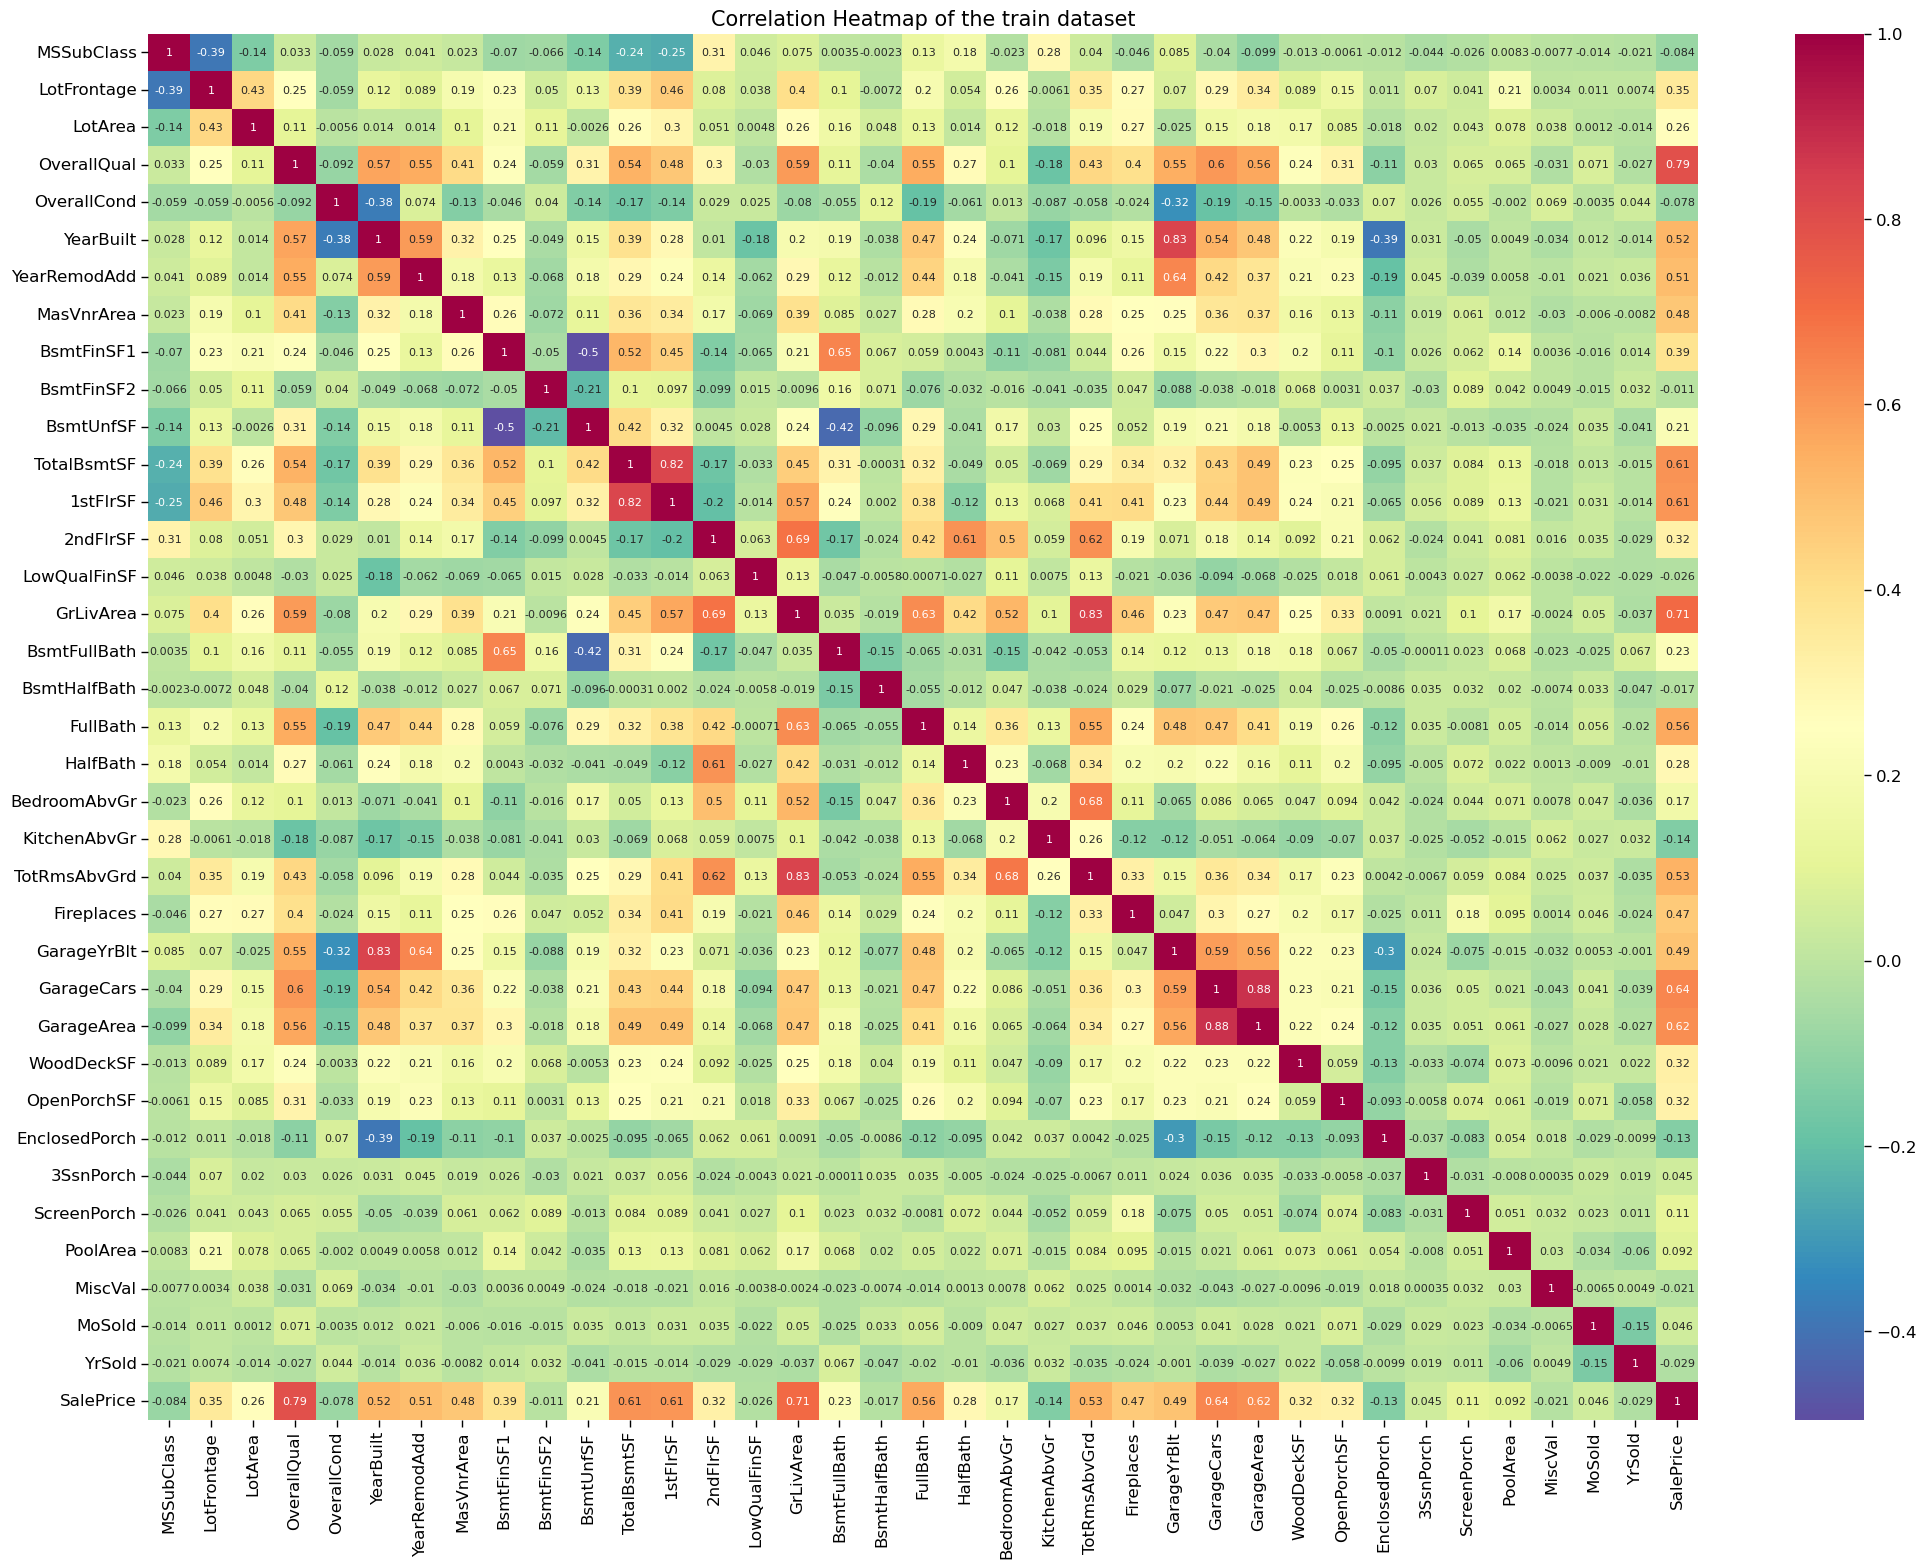

In [12]:
# Plotting the correlation matrix of the regression_train dataset by selecting only columns containing numerical values (float64 or int64)
corr_reg_train = regression_train.select_dtypes(include=['float64', 'int64'])
corr_matrix_train = corr_reg_train.corr()

f, ax = plt.subplots(figsize=(25, 18))
sns.heatmap(corr_matrix_train, 
            annot=True, 
            annot_kws={'size': 8}, 
            cmap="Spectral_r");
plt.title("Correlation Heatmap of the train dataset")
plt.show()

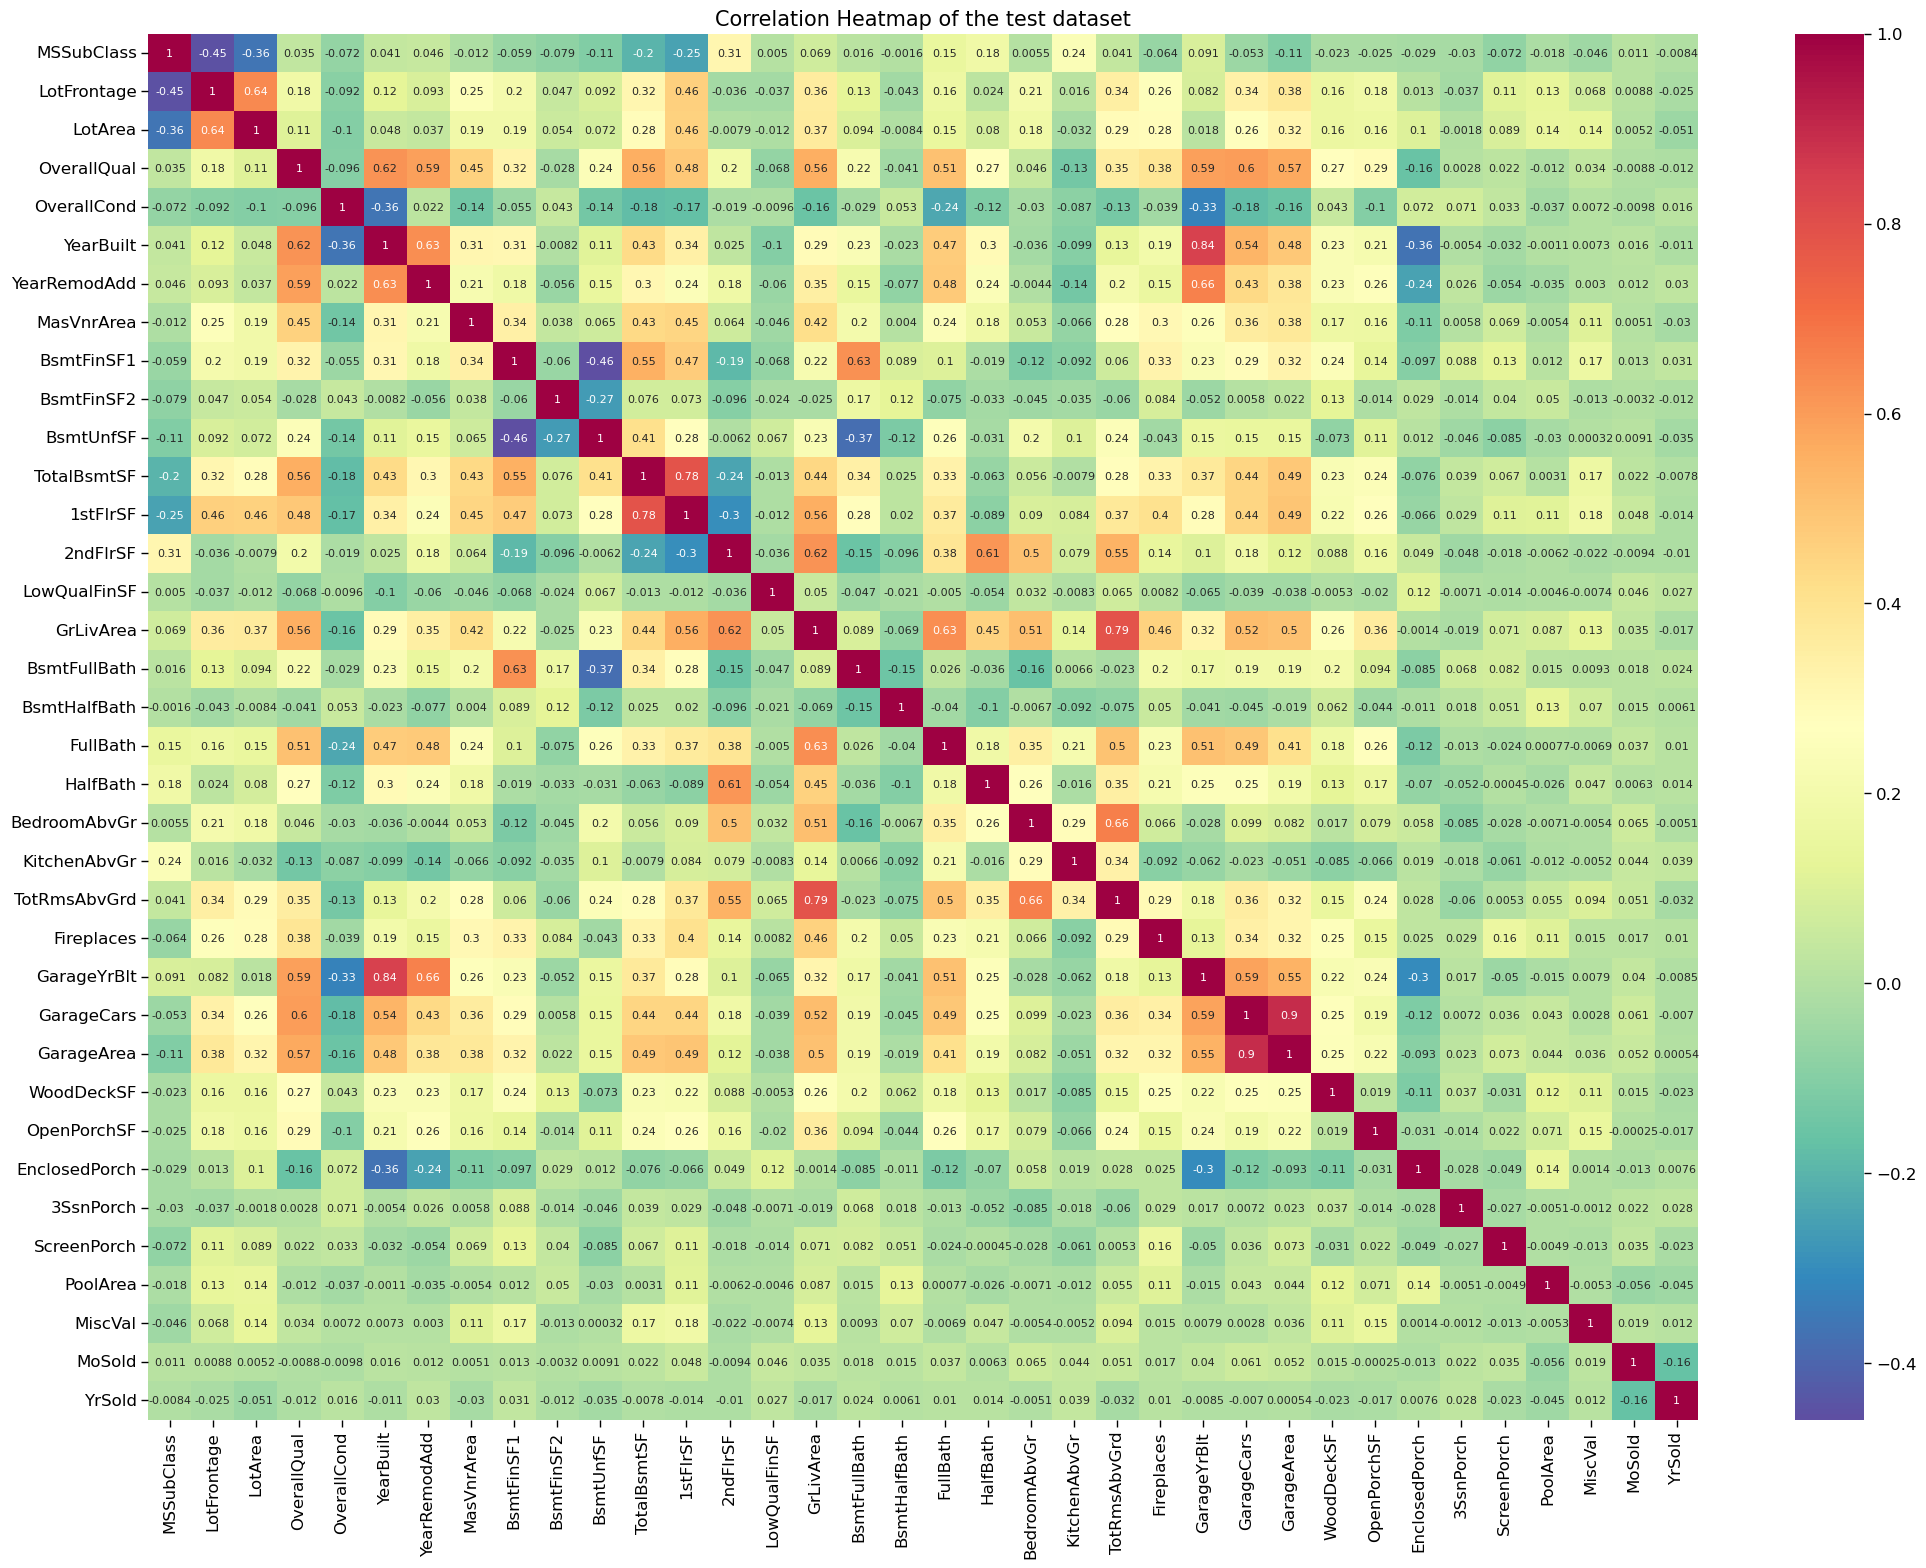

In [13]:
# Plotting the correlation matrix of the regression_test dataset by selecting only columns containing numerical values (float64 or int64)
corr_reg_test = regression_test.select_dtypes(include=['float64', 'int64'])
corr_matrix_test = corr_reg_test.corr()

f, ax = plt.subplots(figsize=(25, 18))
sns.heatmap(corr_matrix_test, 
            annot=True, 
            annot_kws={'size': 8}, 
            cmap="Spectral_r");
plt.title("Correlation Heatmap of the test dataset")
plt.show()

C:\Users\giann\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


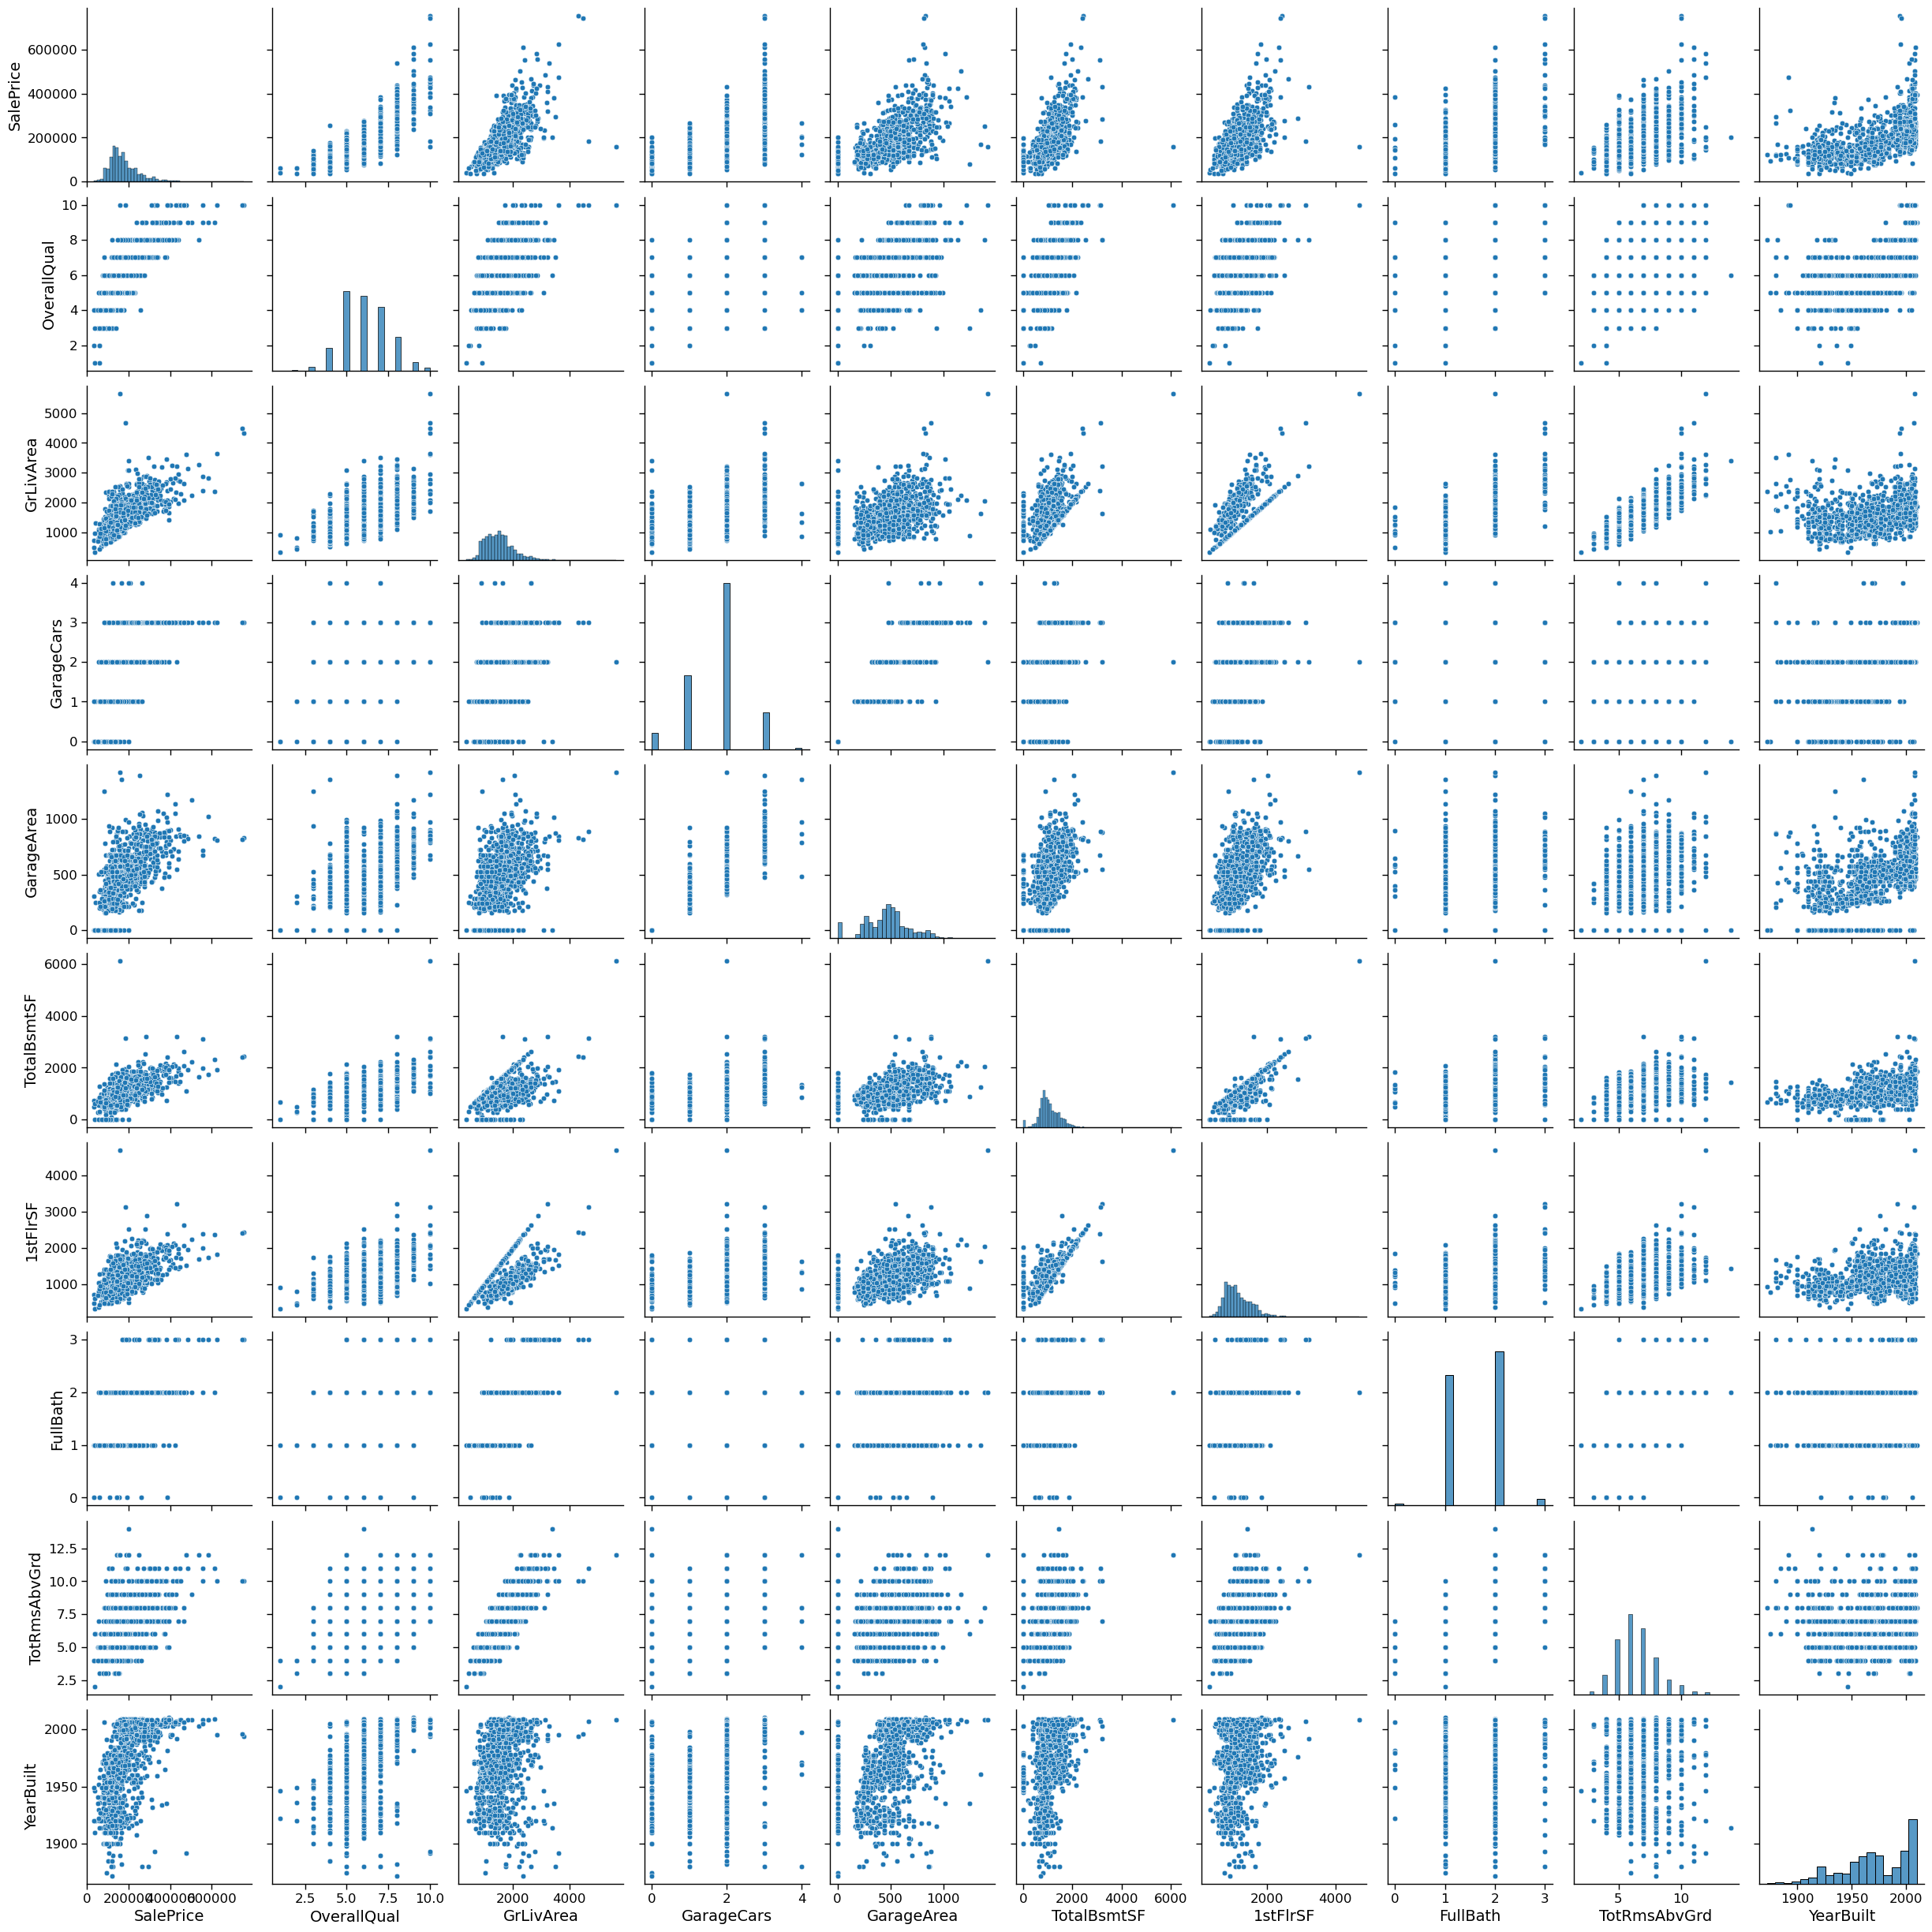

In [14]:
# Plotting a paiplot between 'SalePrice' and its top 10 most correlated variables 

corr_with_saleprice = corr_matrix_train[class_var].abs()
top_10_corr = corr_with_saleprice.nlargest(10)
top_10_corr_l = top_10_corr.index.tolist()

sns.pairplot(regression_train[top_10_corr_l])
plt.show()

C:\Users\giann\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


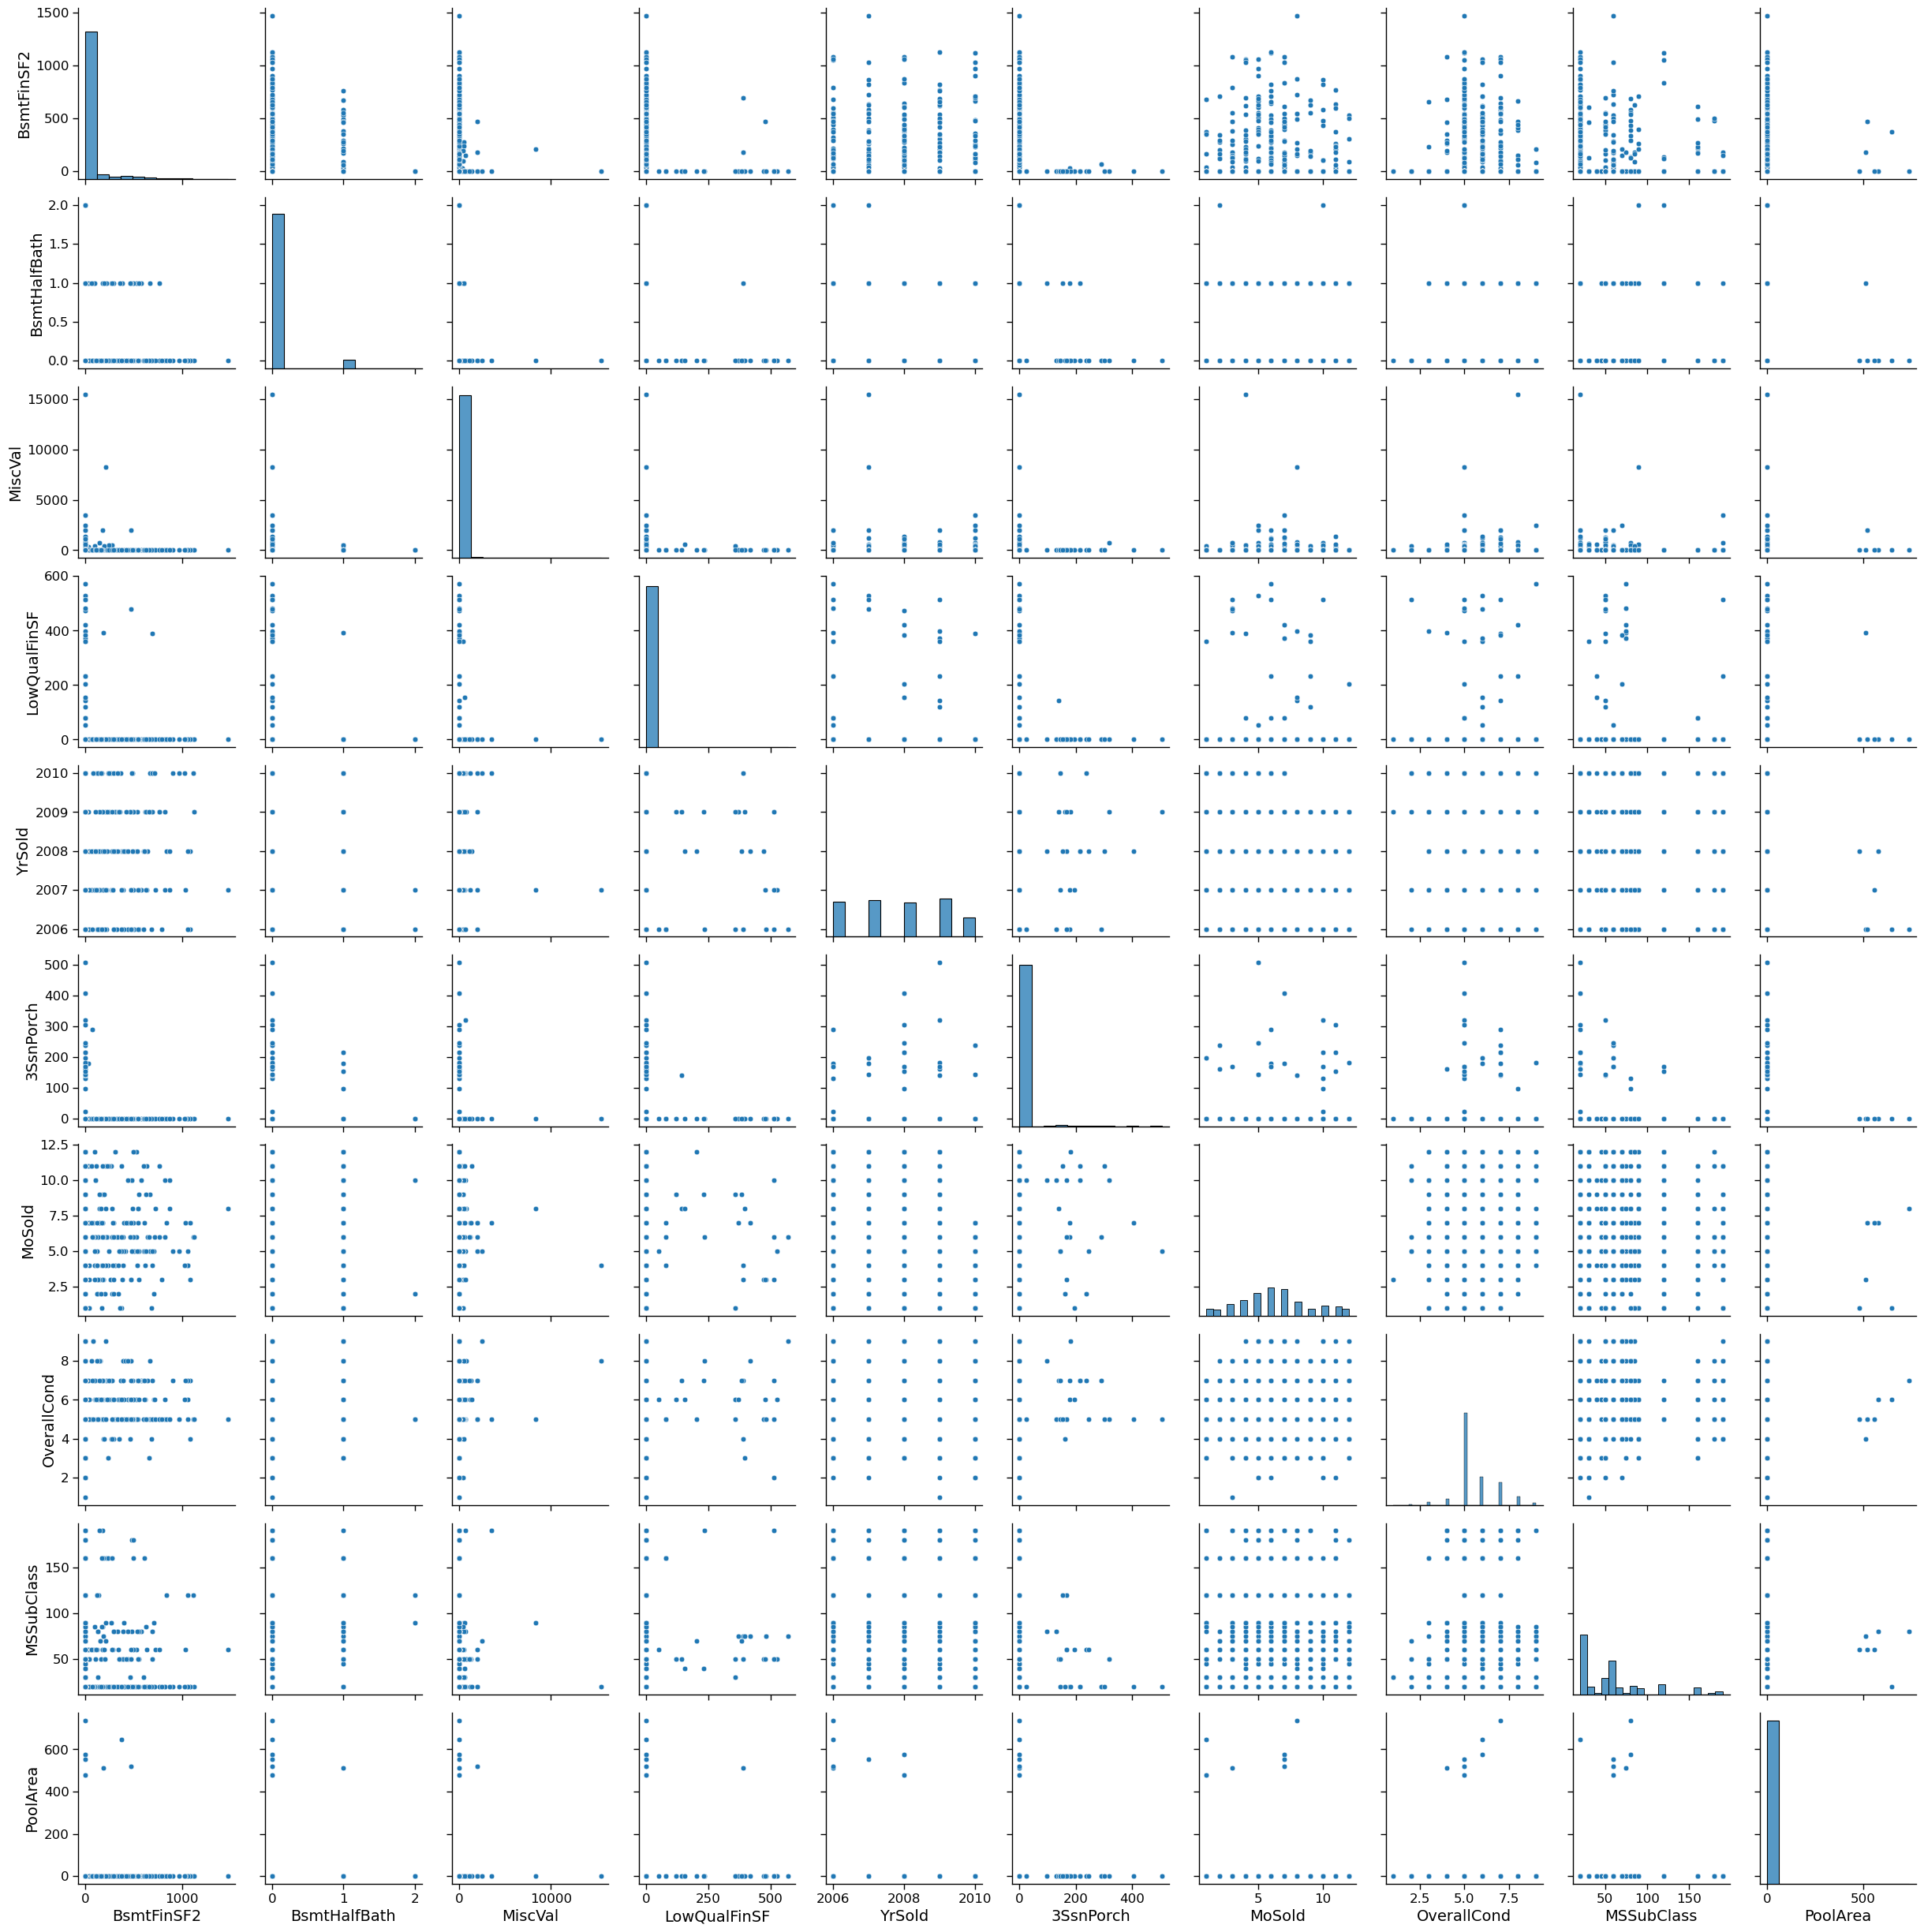

In [15]:
# Plotting a paiplot between 'SalePrice' and its 10 least correlated variables 

corr_with_saleprice = corr_matrix_train[class_var].abs()
least_10_corr = corr_with_saleprice.nsmallest(10)
least_10_corr = least_10_corr.index.tolist()

sns.pairplot(regression_train[least_10_corr])
plt.show()

In [16]:
# Outputting columns of the train dataset that contain missing values, their count, corresponding share & dtype 

missing_percentage_train = regression_train.isnull().mean() * 100
columns_with_missing_values_share_train = missing_percentage_train[missing_percentage_train > 0]

missing_values_train = regression_train.isnull().sum()
columns_with_missing_values_train = missing_values_train[missing_values_train > 0]
columns_with_missing_values_share_train = round(columns_with_missing_values_share_train,2)

columns_types_train = regression_train[columns_with_missing_values_train.index].dtypes

missing_values_df_train = pd.DataFrame({'Count of NaN values train' : columns_with_missing_values_train, 
                                  'Share of NaN values' : columns_with_missing_values_share_train, 
                                  'Dtype' : columns_types_train})

missing_values_df_train['Share of NaN values'] = missing_values_df_train['Share of NaN values'].astype(str) +' %'

print("Table showing the train dataset's columns that contain NaN values and their respective share :\n") 
missing_values_df_train.sort_values(by='Count of NaN values train', ascending=False)

Table showing the train dataset's columns that contain NaN values and their respective share :



Count of NaN values train Share of NaN values    Dtype
PoolQC                             1453             99.52 %   object
MiscFeature                        1406              96.3 %   object
Alley                              1369             93.77 %   object
Fence                              1179             80.75 %   object
MasVnrType                          872             59.73 %   object
FireplaceQu                         690             47.26 %   object
LotFrontage                         259             17.74 %  float64
GarageType                           81              5.55 %   object
GarageYrBlt                          81              5.55 %  float64
GarageFinish                         81              5.55 %   object
GarageQual                           81              5.55 %   object
GarageCond                           81              5.55 %   object
BsmtFinType2                         38               2.6 %   object
BsmtExposure                         38               2.6 %   object
BsmtFinType1                         37              2.53 %   object
BsmtCond                             37              2.53 %   object
BsmtQual                             37              2.53 %   object
MasVnrArea                            8              0.55 %  float64
Electrical                            1              0.07 %   object

In [17]:
# Outputting columns of the test dataset that contain missing values, their count, corresponding share & dtype  

missing_percentage_test = regression_test.isnull().mean() * 100
columns_with_missing_values_share_test = missing_percentage_test[missing_percentage_test > 0]

missing_values_test = regression_test.isnull().sum()
columns_with_missing_values_test = missing_values_test[missing_values_test > 0]
columns_with_missing_values_share_test = round(columns_with_missing_values_share_test,2)

columns_types_test = regression_test[columns_with_missing_values_test.index].dtypes

missing_values_df_test = pd.DataFrame({'Count of NaN values test' : columns_with_missing_values_test, 
                                  'Share of NaN values' : columns_with_missing_values_share_test, 
                                  'Dtype' : columns_types_test})

missing_values_df_test['Share of NaN values'] = missing_values_df_test['Share of NaN values'].astype(str) +' %'

print("Table showing the test dataset's columns that contain NaN values and their respective share :\n") 
missing_values_df_test.sort_values(by='Count of NaN values test', ascending=False)

Table showing the test dataset's columns that contain NaN values and their respective share :



Count of NaN values test Share of NaN values    Dtype
PoolQC                            1456             99.79 %   object
MiscFeature                       1408              96.5 %   object
Alley                             1352             92.67 %   object
Fence                             1169             80.12 %   object
MasVnrType                         894             61.27 %   object
FireplaceQu                        730             50.03 %   object
LotFrontage                        227             15.56 %  float64
GarageCond                          78              5.35 %   object
GarageYrBlt                         78              5.35 %  float64
GarageQual                          78              5.35 %   object
GarageFinish                        78              5.35 %   object
GarageType                          76              5.21 %   object
BsmtCond                            45              3.08 %   object
BsmtExposure                        44              3.02 %   object
BsmtQual                            44              3.02 %   object
BsmtFinType1                        42              2.88 %   object
BsmtFinType2                        42              2.88 %   object
MasVnrArea                          15              1.03 %  float64
MSZoning                             4              0.27 %   object
BsmtFullBath                         2              0.14 %  float64
BsmtHalfBath                         2              0.14 %  float64
Functional                           2              0.14 %   object
Utilities                            2              0.14 %   object
GarageCars                           1              0.07 %  float64
GarageArea                           1              0.07 %  float64
TotalBsmtSF                          1              0.07 %  float64
KitchenQual                          1              0.07 %   object
BsmtUnfSF                            1              0.07 %  float64
BsmtFinSF2                           1              0.07 %  float64
BsmtFinSF1                           1              0.07 %  float64
Exterior2nd                          1              0.07 %   object
Exterior1st                          1              0.07 %   object
SaleType                             1              0.07 %   object

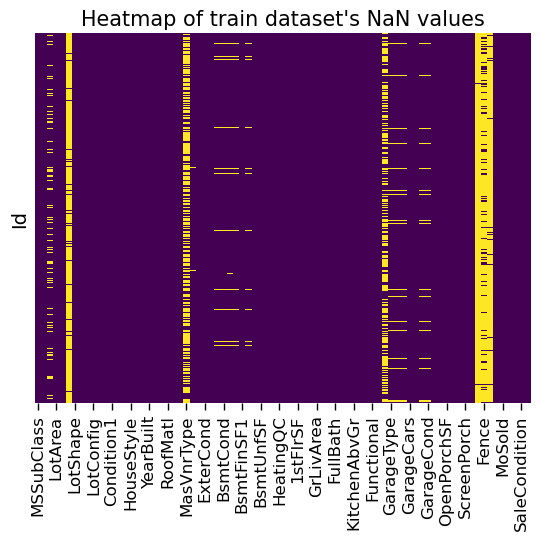

In [18]:
# Plotting a heatmap of train dataset's NaN values 

sns.heatmap(regression_train.isnull(), yticklabels=False, cbar=False, cmap='viridis',);
plt.title("Heatmap of train dataset's NaN values") 
plt.show()

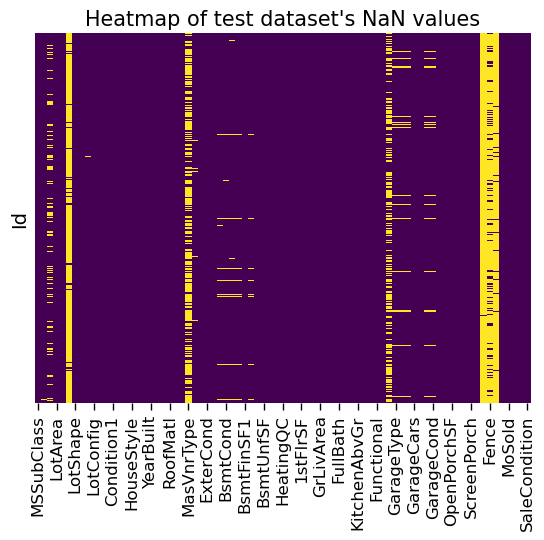

In [19]:
# Plotting a heatmap of test dataset's NaN values 

sns.heatmap(regression_test.isnull(), yticklabels=False, cbar=False, cmap='viridis',);
plt.title("Heatmap of test dataset's NaN values") 
plt.show()

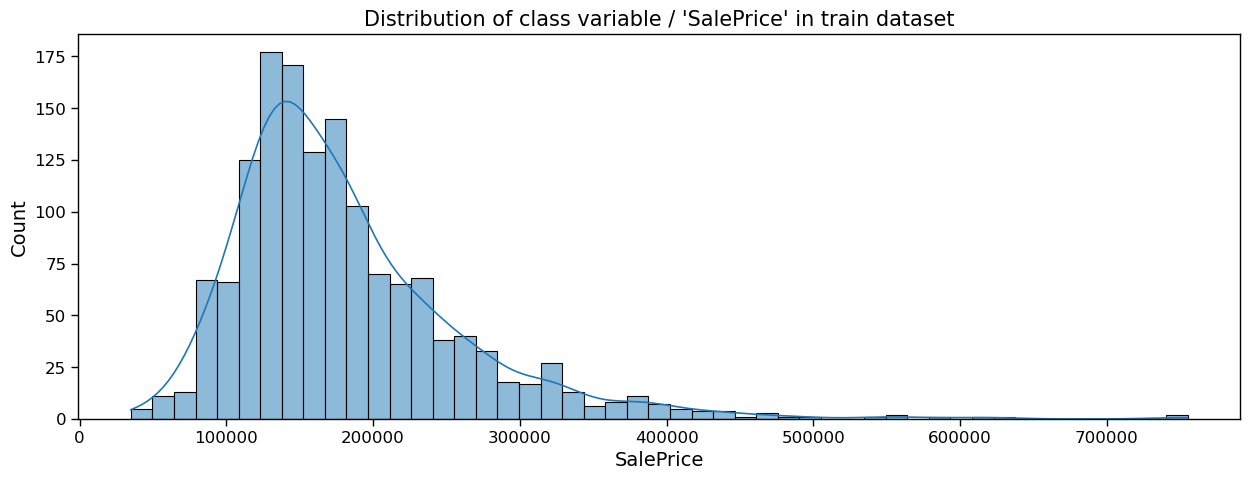

In [20]:
# Plotting a histplot of the class variable  

plt.figure(figsize=(15, 5))
sns.histplot(data=regression_train, x=class_var, kde=True)
plt.title("Distribution of class variable / 'SalePrice' in train dataset")
plt.show()

In [21]:
# Understanding the skewness and kurtosis of the class variable

print('Class variable distribution measures: \n')

skew = regression_train[class_var].skew()
kurt = regression_train[class_var].kurt()

if skew == 0:
    print("Skewness = 0, which indicates a symmetric distribution.")
elif skew > 0:
    print(f"Skeweness is {round(skew,2)}, i.e. > 0, which indicates that the distribution is skewed to the right.")
else:
    print(f"Skeweness is {round(skew,2)}, i.e. < 0, which indicates that the distribution is skewed to the left.")


    
if kurt == 3:
    print("Kurtosis = 3, which indicates that the ditribution is mesokurtic, i.e. a normal distribution.")
elif kurt > 3:
    print(f"Kurtosis is {round(kurt,2)}, i.e. > 3, which indicates that the distribution is leptokurtic.")
else:
    print(f"Kurtosis is {round(kurt,2)}, i.e. < 3, which indicates that the distribution is platykurtic.")    

Class variable distribution measures: 

Skeweness is 1.88, i.e. > 0, which indicates that the distribution is skewed to the right.
Kurtosis is 6.54, i.e. > 3, which indicates that the distribution is leptokurtic.


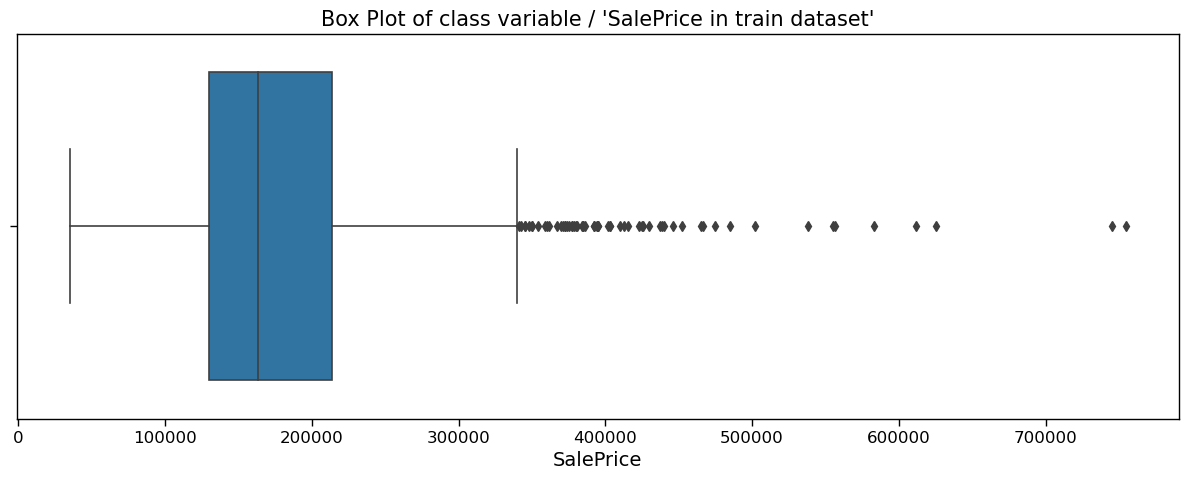

In [22]:
# Plotting a boxplot of the class variable

plt.figure(figsize=(15, 5))
sns.boxplot(x=regression_train[class_var])
plt.title("Box Plot of class variable / 'SalePrice in train dataset'")
plt.show()

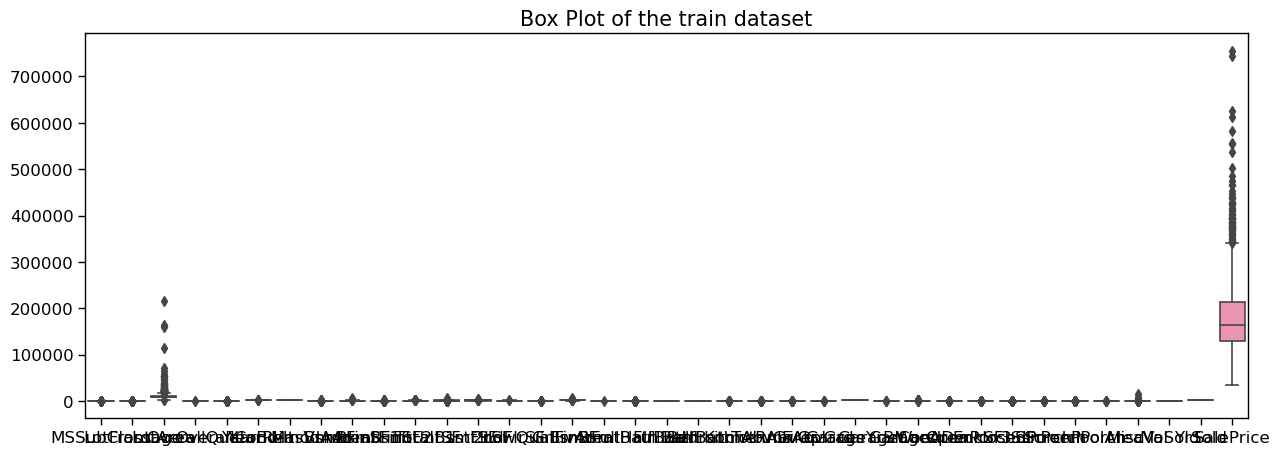

In [23]:
# Plotting a boxplot of the train dataset

plt.figure(figsize=(15, 5))
sns.boxplot(data=regression_train)
plt.title("Box Plot of the train dataset")
plt.show()

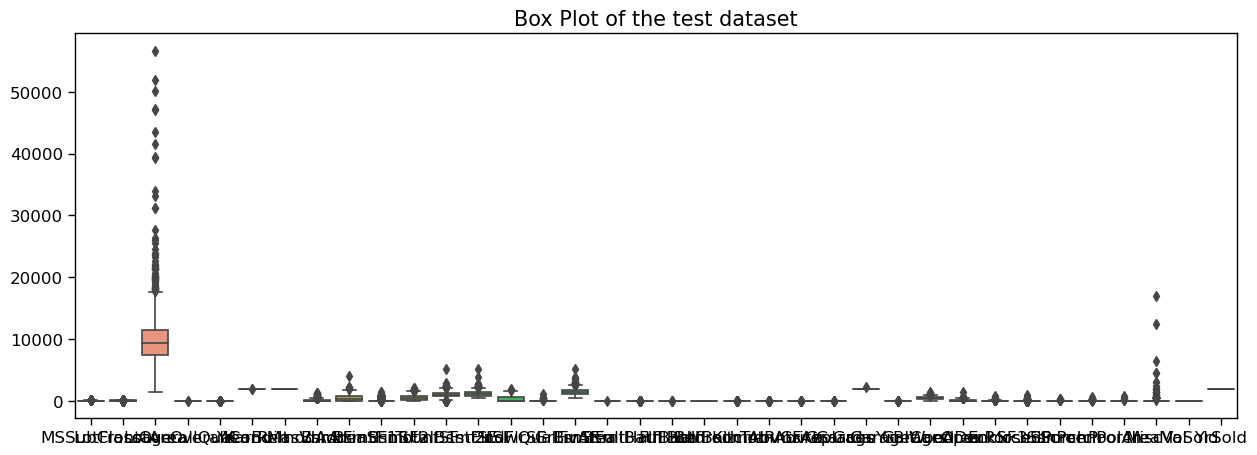

In [24]:
# Plotting a boxplot of the test dataset

plt.figure(figsize=(15, 5))
sns.boxplot(data=regression_test)
plt.title("Box Plot of the test dataset")
plt.show()

### __1.5 Feature dropping__

In [25]:
# Pairs of features with correlation coefficient >= 0.8 

corr_abs = corr_matrix_train.abs()
threshold = 0.8

high_corr_features = corr_abs[corr_abs >= threshold].stack().reset_index()
high_corr_features = high_corr_features[high_corr_features['level_0'] < high_corr_features['level_1']]
high_corr_features = high_corr_features.rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation Coefficient'})

print("Pairs of features with correlation coefficient >= 0.8: \n")
high_corr_features.round(3)

Pairs of features with correlation coefficient >= 0.8: 



Feature 1     Feature 2  Correlation Coefficient
14     1stFlrSF   TotalBsmtSF                    0.820
19    GrLivArea  TotRmsAbvGrd                    0.825
29  GarageYrBlt     YearBuilt                    0.826
33   GarageArea    GarageCars                    0.882

In [26]:
# Dropping one column from pairs that have >= 0.8 correlation between them from regression_train

print(f"Shape of regression_train before dropping correlated columns: \n {regression_train.shape} \n")
regression_train.drop(columns=['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)
print(f"Shape of regression_train after dropping correlated columns: \n {regression_train.shape} \n")

Shape of regression_train before dropping correlated columns: 
 (1460, 80) 

Shape of regression_train after dropping correlated columns: 
 (1460, 76) 



In [27]:
# Dropping one column from pairs that have >= 0.8 correlation between them from regression_test

print(f"Shape of regression_test before dropping correlated columns: \n {regression_test.shape} \n")
regression_test.drop(columns=['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)
print(f"Shape of regression_test after dropping correlated columns: \n {regression_test.shape} \n")

Shape of regression_test before dropping correlated columns: 
 (1459, 79) 

Shape of regression_test after dropping correlated columns: 
 (1459, 75) 



## __2. Independent and dependent variables__ 

### __2.1 Multivariate X & y splitting__

In [28]:
# Splitting the train dataset into X (independent variable) and y (dependent variable) 

y = regression_train['SalePrice']

print('Type of the dependent variable / y: \n', type(y), '\n')
print('Shape of the dependent variable / y: \n', y.shape, '\n')
print("Info of the dependent variable / y: \n")
print(y.info(), '\n')
print("head() of the dependent variable / y in pd.DataFrame format: \n")

y_pddf = y
y_pddf = y_pddf.reset_index(drop=True, inplace=True)
y_pddf = pd.DataFrame({'SalePrice' : y})
y_pddf.head()


Type of the dependent variable / y: 
 <class 'pandas.core.series.Series'> 

Shape of the dependent variable / y: 
 (1460,) 

Info of the dependent variable / y: 

<class 'pandas.core.series.Series'>
Index: 1460 entries, 1 to 1460
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 22.8 KB
None 

head() of the dependent variable / y in pd.DataFrame format: 



SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000

In [29]:
# Splitting the train dataset into X (independent variable) and y (dependent variable) 

X = regression_train.drop(columns=['SalePrice'])
print("\n Shape of the independent variable / X: \n", X.shape)
print("\n Info of the independent variable / X: \n")
print(X.info(), '\n')
print("head() of the independent variable / X: \n")
X.head()


 Shape of the independent variable / X: 
 (1460, 75)

 Info of the independent variable / X: 

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  Overa

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
2          Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
3          Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
4          Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
5          Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

   MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                               
1          NaN       0       2    2008        WD         Normal  
2          NaN       0       5    2007        WD         Normal  
3          NaN       0       9    2008        WD         Normal  
4          NaN       0       2    2006        WD        Abnorml  
5          NaN       0      12    2008        WD         Normal  

[5 rows x 75 columns]

### __2.3 Multivariate train & test set split__

In [30]:
# Splitting X & y into train and test sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state=0)

print('Shape of X_train and y_train: ', X_train.shape, y_train.shape)
print('Shape of X_test and y_test: ',   X_test.shape,  y_test.shape)

Shape of X_train and y_train:  (1168, 75) (1168,)
Shape of X_test and y_test:  (292, 75) (292,)


### __2.4 Univariate X & y splitting__ 

In [31]:
# Through the top_10_corr variable created in section 1.4, Visualizations, we found the top 10 most correlated features of our class variable
# 'SalePrice', we extract the top one, excluding the one with itself, i.e. 'OverallQual' - ~0.79

top_1_corr = top_10_corr[1:2]
top_1_corr = top_1_corr.index.to_list()
print(top_1_corr)

['OverallQual']


In [32]:
# Using the most correlated column to create X of the univariate regression model from regression_train dataset and displaying basic info

X_univa = regression_train[top_1_corr]

print("\n Shape of the independent variable / X_univa: \n", X_univa.shape)
print("\n Info of the independent variable / X_univa: \n")
print(X_univa.info(), '\n')
print("head() of the independent variable / X_univa: \n")
X_univa.head()


 Shape of the independent variable / X_univa: 
 (1460, 1)

 Info of the independent variable / X_univa: 

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
dtypes: int64(1)
memory usage: 22.8 KB
None 

head() of the independent variable / X_univa: 



OverallQual
Id             
1             7
2             6
3             7
4             7
5             8

__y remains the same as in the multivariate separation__

### __2.5 Univariate train & test set split__ 

In [33]:
# Splitting X_univa & y into train and test sets 

X_train_univa, X_test_univa, y_train_univa, y_test_univa = train_test_split(X_univa, y, 
                                                    test_size = 0.2, 
                                                    random_state=0)

print('Shape of X_train_univa and y_train_univa: ', X_train_univa.shape, y_train_univa.shape)
print('Shape of X_test_univa and y_test_univa: ',   X_test_univa.shape,  y_test_univa.shape)

Shape of X_train_univa and y_train_univa:  (1168, 1) (1168,)
Shape of X_test_univa and y_test_univa:  (292, 1) (292,)


__'test.csv' is not bing splitted into X & y, since there is no 'SalePrice' column which is the class variable. The job of the models in the following code, is to predict the 'SalePrice' in the 'test.csv' dataset.__

## __3. Data pre-processing__

### __3.1 Feature tranformation & engineering__

In [34]:
# Filtering and outputting the unique elements of the columns that contain string values to test whether there is room for feature enginnering 

unique_elements = {}
columns = []

for column in regression_train.columns:
    columns.append(column)

for column in columns:
    unique_values = regression_train[column].unique()
    string_values = [value for value in unique_values if isinstance(value, str)]
    if string_values:
        unique_elements[column] = string_values

for column in columns:
    if column in unique_elements:
        print('\n')
        print(f"Unique elements for column '{column}':")
        for item in unique_elements[column]:
            print(item)



Unique elements for column 'MSZoning':
RL
RM
C (all)
FV
RH


Unique elements for column 'Street':
Pave
Grvl


Unique elements for column 'Alley':
Grvl
Pave


Unique elements for column 'LotShape':
Reg
IR1
IR2
IR3


Unique elements for column 'LandContour':
Lvl
Bnk
Low
HLS


Unique elements for column 'Utilities':
AllPub
NoSeWa


Unique elements for column 'LotConfig':
Inside
FR2
Corner
CulDSac
FR3


Unique elements for column 'LandSlope':
Gtl
Mod
Sev


Unique elements for column 'Neighborhood':
CollgCr
Veenker
Crawfor
NoRidge
Mitchel
Somerst
NWAmes
OldTown
BrkSide
Sawyer
NridgHt
NAmes
SawyerW
IDOTRR
MeadowV
Edwards
Timber
Gilbert
StoneBr
ClearCr
NPkVill
Blmngtn
BrDale
SWISU
Blueste


Unique elements for column 'Condition1':
Norm
Feedr
PosN
Artery
RRAe
RRNn
RRAn
PosA
RRNe


Unique elements for column 'Condition2':
Norm
Artery
RRNn
Feedr
PosN
PosA
RRAn
RRAe


Unique elements for column 'BldgType':
1Fam
2fmCon
Duplex
TwnhsE
Twnhs


Unique elements for column 'HouseStyle':
2Story
1Story


#### Analysis of transformation on categorical values

1) __'LotShape'__ elements can be transformed:
- Reg = Regular --> 4
- IR1 = Slightly irregular --> 3
- IR2 = Moderately irregular --> 2 
- IR3 = Irregular --> 1

2) __'LandSlope'__ elements can be transformed:
- Gtl = Gentle slope --> 1 
- Mod = Moderate slope --> 2
- Sev = Severe slope --> 3

3) __'CentralAir'__ elements can be transformed:
- N = No --> 0
- Y = Yes --> 1

4) __'Functional'__ elements can be transformed:
- Typ = Typical Functionality --> 8
- Min1 = Minor Deductions 1 --> 7
- Min2 = Minor Deductions 2 --> 6
- Mod = Moderate Deductions --> 5
- Maj1 = Major Deductions 1 --> 4
- Maj2 = Major Deductions 2 --> 3
- Sev = Severely Damaged --> 2
- Sal = Salvage only --> 1

5) __'GarageFinish'__ elements can be transformed:
- Fin = Finished --> 3
- RFn = Rough Finished --> 2
- Unf = Unfinished --> 1
- NA = No Garage --> 0

6) __'BsmtExposure'__ elements can be transformed:
- Gd = Good Exposure --> 4 
- Av = Average Exposure --> 3
- Mn = Mimimum Exposure --> 2 
- No = No Exposure --> 1 
- NA = No Basement --> 0

6) __'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC'__ elements can be transformed:
- Ex = Excellent --> 5
- Gd = Good --> 4
- TA = Typical --> 3
- Fa = Fair --> 2
- Po = Poor --> 1
- NA = Feauture/section not present --> 0


In [35]:
# Transformation of categorical values on X_train, X_test & regression_test

replacement_dict = {
    'LotShape': {'Reg' : 4, 'IR1' : 3, 'IR2' : 2, 'IR3' : 1},
    'LandSlope': {'Sev' : 3, 'Mod' : 2, 'Gtl' : 1},
    'CentralAir': { 'Y' : 1, 'N' : 0},
    'Functional': {'Typ' : 8, 'Min1' : 7,  'Min2' : 6, 'Mod' : 5, 'Maj1': 4, 'Maj2' : 3, 'Sev' : 2, 'Sal' : 1},
    'GarageFinish': {'Fin' : 4, 'RFn' : 3, 'Unf' : 2, np.nan : 0},
    'BsmtExposure': {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, np.nan : 0},
    'ExterQual': {'Ex' : 5,'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0}, 
    'ExterCond': {'Ex' : 5,'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0}, 
    'BsmtQual': {'Ex' : 5,'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0}, 
    'BsmtCond': {'Ex' : 5,'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0}, 
    'HeatingQC': {'Ex' : 5,'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
    'KitchenQual': {'Ex' : 5,'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0}, 
    'FireplaceQu': {'Ex' : 5,'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0}, 
    'GarageQual': {'Ex' : 5,'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0}, 
    'GarageCond': {'Ex' : 5,'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0}, 
    'PoolQC': {'Ex' : 5,'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0}
}

for column, repl_dict in replacement_dict.items():
    X_train[column].replace(repl_dict, inplace=True)
    X_test[column].replace(repl_dict, inplace=True)
    regression_test[column].replace(repl_dict, inplace=True)
    print(f'{column} sanity check:\n X_train - {X_train[column].unique()} \n X_test - {X_test[column].unique()} \n regression_test - {regression_test[column].unique()}\n\n')

LotShape sanity check:
 X_train - [4 3 2 1] 
 X_test - [3 4 2 1] 
 regression_test - [4 3 2 1]


LandSlope sanity check:
 X_train - [1 2 3] 
 X_test - [1 2] 
 regression_test - [1 2 3]


CentralAir sanity check:
 X_train - [1 0] 
 X_test - [1 0] 
 regression_test - [1 0]


Functional sanity check:
 X_train - [8 7 6 3 5 4] 
 X_test - [4 8 3 6 7 2 5] 
 regression_test - [ 8.  6.  7.  5.  4.  2.  3. nan]


GarageFinish sanity check:
 X_train - [2. 3. 4. 0.] 
 X_test - [3. 2. 4. 0.] 
 regression_test - [2. 4. 3. 0.]


BsmtExposure sanity check:
 X_train - [3. 1. 4. 0. 2.] 
 X_test - [1. 4. 3. 2. 0.] 
 regression_test - [1. 4. 2. 3. 0.]


ExterQual sanity check:
 X_train - [5 3 4 2] 
 X_test - [4 3 2 5] 
 regression_test - [3 4 5 2]


ExterCond sanity check:
 X_train - [3 4 5 2 1] 
 X_test - [3 4 2] 
 regression_test - [3 4 2 1 5]


BsmtQual sanity check:
 X_train - [5. 3. 4. 0. 2.] 
 X_test - [3. 4. 5. 0. 2.] 
 regression_test - [3. 4. 5. 2. 0.]


BsmtCond sanity check:
 X_train - [3. 4. 0

#### Analysis of engineered columns

1) __'HasPool'__ =
- If PoolArea > 0 --> 1 = Yes
- If PoolArea < 0 --> 0 = No
    
2) __'AgeAtSale'__ = 
- YrSold - YearBuilt

In [36]:
# New columns engineering

# HasPool
X_test['HasPool'] = np.where(X_test['PoolArea'] > 0, 1, 0)
X_train['HasPool'] = np.where(X_train['PoolArea'] > 0, 1, 0)
regression_test['HasPool'] = np.where(regression_test['PoolArea'] > 0, 1, 0)

print("New column 'HasPool' sanity check \n")
print(f"X_test \n {pd.crosstab(X_test['HasPool'], X_test['PoolArea'])} \n")
print(f"X_train \n {pd.crosstab(X_train['HasPool'], X_train['PoolArea'])} \n")
print(f"regression_test \n {pd.crosstab(regression_test['HasPool'], regression_test['PoolArea'])} \n")

# AgeAtSale
X_test['AgeOfPropAtSale'] = X_test['YrSold'] - X_test['YearBuilt']
X_train['AgeOfPropAtSale'] = X_train['YrSold'] - X_train['YearBuilt']
regression_test['AgeOfPropAtSale'] = regression_test['YrSold'] - regression_test['YearBuilt']

print('\n\n')
print("New column 'AgeOfPropAtSale' sanity check \n")
print(f"X_test \n {X_test[['YrSold', 'YearBuilt', 'AgeOfPropAtSale']].head()} \n")
print(f"X_train \n {X_train[['YrSold', 'YearBuilt', 'AgeOfPropAtSale']].head()} \n")
print(f"regression_test \n {regression_test[['YrSold', 'YearBuilt', 'AgeOfPropAtSale']].head()} \n")

New column 'HasPool' sanity check 

X_test 
 PoolArea  0    480  519  555
HasPool                     
0         289    0    0    0
1           0    1    1    1 

X_train 
 PoolArea   0    512  576  648  738
HasPool                           
0         1164    0    0    0    0
1            0    1    1    1    1 

regression_test 
 PoolArea   0    144  228  368  444  561  800
HasPool                                     
0         1453    0    0    0    0    0    0
1            0    1    1    1    1    1    1 




New column 'AgeOfPropAtSale' sanity check 

X_test 
      YrSold  YearBuilt  AgeOfPropAtSale
Id                                     
530    2007       1957               50
492    2006       1941               65
460    2009       1950               59
280    2008       1977               31
656    2010       1971               39 

X_train 
      YrSold  YearBuilt  AgeOfPropAtSale
Id                                     
619    2007       2007                0
871    2009      

### __3.2 Missing values__

In [37]:
# Outputting columns of X_train, X_test & regression_test that contain missing values, their count and corresponding share  

def missing_val(data, dataname):
    missing_percentage = data.isnull().mean() * 100
    columns_with_missing_values_share = missing_percentage[missing_percentage > 0]
    
    missing_values = data.isnull().sum()
    columns_with_missing_values = missing_values[missing_values > 0]
    columns_with_missing_values_share = round(columns_with_missing_values_share, 2)
    
    columns_types = data[columns_with_missing_values.index].dtypes
    
    missing_values_df = pd.DataFrame({f'Count of NaN values {dataname}': columns_with_missing_values, 
                                      'Share of NaN values': columns_with_missing_values_share, 
                                      'Dtype': columns_types})
    
    print(f"Table showing {dataname}'s columns that contain NaN values, their respective share & dtype :\n")
    return missing_values_df


X_train_NaN = missing_val(X_train, 'X_train')
print(X_train_NaN, '\n\n')

X_test_NaN = missing_val(X_test, 'X_test')
print(X_test_NaN, '\n\n')

regression_test_NaN = missing_val(regression_test, 'regression_test')
print(regression_test_NaN, '\n\n')

Table showing X_train's columns that contain NaN values, their respective share & dtype :

              Count of NaN values X_train  Share of NaN values    Dtype
LotFrontage                           212                18.15  float64
Alley                                1097                93.92   object
MasVnrType                            707                60.53   object
MasVnrArea                              6                 0.51  float64
BsmtFinType1                           28                 2.40   object
BsmtFinType2                           29                 2.48   object
Electrical                              1                 0.09   object
GarageType                             58                 4.97   object
Fence                                 954                81.68   object
MiscFeature                          1119                95.80   object 


Table showing X_test's columns that contain NaN values, their respective share & dtype :

              Count of N

In [38]:
# Outputting X_train, X_test & regression_test columns that their missing value share is > 50%, their count, corresponding share & dtype

def missing_val_50(data, dataname):
    missing_fifty_df = data[data['Share of NaN values'] >50]
    print(f"Table below showing {dataname}'s columns in which NaN values share is above 50% :\n") 
    return missing_fifty_df

X_train_NaN50 = missing_val_50(X_train_NaN, 'X_train')
print(X_train_NaN50, '\n\n')

X_test_NaN50 = missing_val_50(X_test_NaN, 'X_test')
print(X_test_NaN50, '\n\n')

regression_test_NaN50 = missing_val_50(regression_test_NaN, 'regression_test')
print(regression_test_NaN50, '\n\n')

Table below showing X_train's columns in which NaN values share is above 50% :

             Count of NaN values X_train  Share of NaN values   Dtype
Alley                               1097                93.92  object
MasVnrType                           707                60.53  object
Fence                                954                81.68  object
MiscFeature                         1119                95.80  object 


Table below showing X_test's columns in which NaN values share is above 50% :

             Count of NaN values X_test  Share of NaN values   Dtype
Alley                               272                93.15  object
MasVnrType                          165                56.51  object
Fence                               225                77.05  object
MiscFeature                         287                98.29  object 


Table below showing regression_test's columns in which NaN values share is above 50% :

             Count of NaN values regression_test  Sh

In [39]:
# Identifying the unique element of the columns with NaN share > 50%

columns_list = list(regression_test_NaN50.index)
unique_elements = {}

for column in columns_list:
    unique_elements[column] = {
        'X_train': X_train[column].unique(),
        'X_test': X_test[column].unique(),
        'regression_test': regression_test[column].unique()}

unique_elements_df = pd.DataFrame.from_dict(unique_elements, orient='index')

print("Unique elements of X_train, X_test & regression_test columns with NaN share > 50%: \n")      
unique_elements_df

Unique elements of X_train, X_test & regression_test columns with NaN share > 50%: 



X_train                           X_test  \
Alley                      [nan, Grvl, Pave]                [nan, Pave, Grvl]   
MasVnrType     [BrkFace, nan, Stone, BrkCmn]    [nan, BrkCmn, BrkFace, Stone]   
Fence        [nan, GdWo, GdPrv, MnPrv, MnWw]  [nan, MnPrv, MnWw, GdWo, GdPrv]   
MiscFeature          [nan, Shed, Gar2, Othr]                [nan, Shed, TenC]   

                             regression_test  
Alley                      [nan, Pave, Grvl]  
MasVnrType     [nan, BrkFace, Stone, BrkCmn]  
Fence        [MnPrv, nan, GdPrv, GdWo, MnWw]  
MiscFeature          [nan, Gar2, Shed, Othr]

#### NaN values in columns with NaN share > 50% 

__Column understanding__

Only by understanding the elements of each column, we will be able to decide how to process their NaN values more effectively.

1) Alley - Type of alley access to property:
- Grvl = Gravel 
- Pave = Paved 
- NaN = No alley access

We decided the best course of action to be imputing NaN with a its respective string actual meaning 'no alley access'.


2) MasVnrType - Masonry veneer type:
- BrkCmn = Brick Common
- BrkFace = Brick Face,
- CBlock = Cinder Block 
- Stone = Stone
- NaN = None 

We decided the best course of action to be imputing NaN with a its respective string actual meaning 'none'.


3) Fence - Fence quality:
- GdPrv = Good Privacy
- MnPrv = Minimum Privacy
- GdWo = Good Wood 
- MnWw = Minimum Wood/Wire
- NaN = No Fence

We decided the best course of action to be imputing NaN with a its respective string actual meaning 'no fence'.

 
4) MiscFeature - Miscellaneous feature not covered in other categories:
- Elev = Elevator
- Gar2 = 2nd Garage (if not described in garage section)
- Othr = Other
- Shed = Shed (over 100 SF)
- TenC = Tennis Court
- NaN = None

We decided the best course of action to be imputing NaN with a its respective string actual meaning 'none'.



In [40]:
# Replacement of NaN values on columns of X_train, X_test & regression_test with NaN share > 50%

replacement_dict = {
    'Alley': {np.nan : 'no alley access'},
    'MasVnrType': {np.nan : 'none'},
    'Fence': {np.nan : 'no fence'},
    'MiscFeature': {np.nan : 'none'},
}

for column, repl_dict in replacement_dict.items():
    X_train[column].replace(repl_dict, inplace=True)
    X_test[column].replace(repl_dict, inplace=True)
    regression_test[column].replace(repl_dict, inplace=True)
    print(f'{column} sanity check:\n X_train - {X_train[column].unique()} \n X_test - {X_test[column].unique()} \n regression_test - {regression_test[column].unique()}\n\n')

Alley sanity check:
 X_train - ['no alley access' 'Grvl' 'Pave'] 
 X_test - ['no alley access' 'Pave' 'Grvl'] 
 regression_test - ['no alley access' 'Pave' 'Grvl']


MasVnrType sanity check:
 X_train - ['BrkFace' 'none' 'Stone' 'BrkCmn'] 
 X_test - ['none' 'BrkCmn' 'BrkFace' 'Stone'] 
 regression_test - ['none' 'BrkFace' 'Stone' 'BrkCmn']


Fence sanity check:
 X_train - ['no fence' 'GdWo' 'GdPrv' 'MnPrv' 'MnWw'] 
 X_test - ['no fence' 'MnPrv' 'MnWw' 'GdWo' 'GdPrv'] 
 regression_test - ['MnPrv' 'no fence' 'GdPrv' 'GdWo' 'MnWw']


MiscFeature sanity check:
 X_train - ['none' 'Shed' 'Gar2' 'Othr'] 
 X_test - ['none' 'Shed' 'TenC'] 
 regression_test - ['none' 'Gar2' 'Shed' 'Othr']




In [41]:
# Outputting X_train, X_test & regression_test columns that their missing value share is < 50%, their count, corresponding share & dtype

def missing_val_below_50(data):
    missing_fifty_df = data[data['Share of NaN values'] <50]
    return missing_fifty_df

X_train_NaNb50 = missing_val_below_50(X_train_NaN)
print(f"Table below showing X_train's columns in which NaN values share is below 50% :\n {X_train_NaNb50} \n\n")

X_test_NaNb50 = missing_val_below_50(X_test_NaN)
print(f"Table below showing X_test's columns in which NaN values share is below 50% :\n {X_test_NaNb50} \n\n")


regression_test_NaNb50 = missing_val_below_50(regression_test_NaN)
print(f"Table below showing regression_test's columns in which NaN values share is below 50% :\n {regression_test_NaNb50} \n\n")

Table below showing X_train's columns in which NaN values share is below 50% :
               Count of NaN values X_train  Share of NaN values    Dtype
LotFrontage                           212                18.15  float64
MasVnrArea                              6                 0.51  float64
BsmtFinType1                           28                 2.40   object
BsmtFinType2                           29                 2.48   object
Electrical                              1                 0.09   object
GarageType                             58                 4.97   object 


Table below showing X_test's columns in which NaN values share is below 50% :
               Count of NaN values X_test  Share of NaN values    Dtype
LotFrontage                           47                16.10  float64
MasVnrArea                             2                 0.68  float64
BsmtFinType1                           9                 3.08   object
BsmtFinType2                           9          

#### NaN values in columns with NaN share < 50%

Since, NaN share in all columns above is significantly below 50%, we will apply below imputings:
- Numerical values : startegy=median
- Categorical values : strategy most_frequent

In [42]:
# Initiating two imputers; 1. for categorical values / object 2. for numerical values / float64  

imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Creating two lists; 1. for categorical values / object 2. for numerical values / float64
num_rows = regression_test_NaNb50[regression_test_NaNb50['Dtype'] == 'float64']
num_list = list(num_rows.index)
cat_rows = regression_test_NaNb50[regression_test_NaNb50['Dtype'] == 'object']
cat_list = list(cat_rows.index)

print('Columns with NaN values of numerical nature: \n\n' , num_list, '\n\n')
print('Columns with NaN values of categorical nature: \n\n' , cat_list, '\n')

def imputation(lists, imp, df1, df2, df3):
    for element in lists:
        df1[[element]] = imp.fit_transform(df1[[element]])
        df2[[element]] = imp.transform(df2[[element]])
        df3[[element]] = imp.transform(df3[[element]])
        
    return df1, df2 ,df3

imputation(num_list, imp_num, X_train, X_test, regression_test)
imputation(cat_list, imp_cat, X_train, X_test, regression_test)



Columns with NaN values of numerical nature: 

 ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageArea'] 


Columns with NaN values of categorical nature: 

 ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'SaleType'] 



(      MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
 Id                                                                        
 619           20       RL         90.0    11694   Pave  no alley access   
 871           20       RL         60.0     6600   Pave  no alley access   
 93            30       RL         80.0    13360   Pave             Grvl   
 818           20       RL         69.0    13265   Pave  no alley access   
 303           20       RL        118.0    13704   Pave  no alley access   
 ...          ...      ...          ...      ...    ...              ...   
 764           60       RL         82.0     9430   Pave  no alley access   
 836           20       RL         60.0     9600   Pave  no alley access   
 1217          90       RM         68.0     8930   Pave  no alley access   
 560          120       RL         69.0     3196   Pave  no alley access   
 685           60       RL         58.0    16770   Pave  no alley access   
 
       Lot

In [43]:
# Sanity check for imputation of NaN values by outputting columns of X_train, X_test & regression_test that contain missing values, 
# their count and corresponding share  

def missing_val(data, dataname):
    missing_percentage = data.isnull().mean() * 100
    columns_with_missing_values_share = missing_percentage[missing_percentage > 0]
    
    missing_values = data.isnull().sum()
    columns_with_missing_values = missing_values[missing_values > 0]
    columns_with_missing_values_share = round(columns_with_missing_values_share, 2)
    
    columns_types = data[columns_with_missing_values.index].dtypes
    
    missing_values_df = pd.DataFrame({f'Count of NaN values {dataname}': columns_with_missing_values, 
                                      'Share of NaN values': columns_with_missing_values_share, 
                                      'Dtype': columns_types})
    
    print(f"Table showing {dataname}'s columns that contain NaN values, their respective share & dtype :\n")
    return missing_values_df


X_train_NaN = missing_val(X_train, 'X_train')
print(X_train_NaN, '\n\n')

X_test_NaN = missing_val(X_test, 'X_test')
print(X_test_NaN, '\n\n')

regression_test_NaN = missing_val(regression_test, 'regression_test')
print(regression_test_NaN, '\n\n')

Table showing X_train's columns that contain NaN values, their respective share & dtype :

            Count of NaN values X_train  Share of NaN values   Dtype
Electrical                            1                 0.09  object 


Table showing X_test's columns that contain NaN values, their respective share & dtype :

Empty DataFrame
Columns: [Count of NaN values X_test, Share of NaN values, Dtype]
Index: [] 


Table showing regression_test's columns that contain NaN values, their respective share & dtype :

Empty DataFrame
Columns: [Count of NaN values regression_test, Share of NaN values, Dtype]
Index: [] 




In [44]:
# Imputing NaN in Electrical column of X_train

print(f"Unique values of X_train['Electrical'] before imputation: \n {X_train['Electrical'].unique()} \n\n")
X_train[['Electrical']] = imp_cat.fit_transform(X_train[['Electrical']])
print(f"Unique values of X_train['Electrical'] after imputation: \n {X_train['Electrical'].unique()}")


Unique values of X_train['Electrical'] before imputation: 
 ['SBrkr' 'FuseF' 'FuseA' 'FuseP' nan 'Mix'] 


Unique values of X_train['Electrical'] after imputation: 
 ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']


### __3.3 One-hot encoding of multivariate datasets and regression_test__

In [45]:
# Displaying columns with dtype object, saving them in a variable and using it to apply one hot encoding to all datasets  

X_train_str = X_train.dtypes[X_train.dtypes == object]
print(f'X_train, X_test & regression_test columns with dtype object: \n{X_train_str} \n\n')

columns_to_encode = X_train_str.index.to_list()


def ohe(df, df_name):
    df_ohe = df[columns_to_encode]
    df_ohe = pd.get_dummies(df_ohe, dtype=int)
    
    print(f"Shape of {df_name} before one hot encoding: \n {df.shape} \n")
    df = df.drop(columns_to_encode, axis = 1)
    df = df.join(df_ohe)
    print(f"Shape of {df_name} after one hot encoding: \n {df.shape} \n\n")
    
    return df

X_train = ohe(X_train, 'X_train')
X_test = ohe(X_test, 'X_test')
regression_test = ohe(regression_test, 'regression_test')

X_train, X_test & regression_test columns with dtype object: 
MSZoning         object
Street           object
Alley            object
LandContour      object
Utilities        object
LotConfig        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
Foundation       object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
Electrical       object
GarageType       object
PavedDrive       object
Fence            object
MiscFeature      object
SaleType         object
SaleCondition    object
dtype: object 


Shape of X_train before one hot encoding: 
 (1168, 77) 

Shape of X_train after one hot encoding: 
 (1168, 234) 


Shape of X_test before one hot encoding: 
 (292, 77) 

Shape of X_test after one hot encoding: 
 (292, 213) 


Shape of regression_test before one hot encodin

In [46]:
# Sanity check for NaN values after OHE

print((X_train.isnull().sum() >0).any())
print((X_test.isnull().sum() >0).any())
print((regression_test.isnull().sum() >0).any())

False
False
False


In [47]:
# Function creation which adds missing columns of each dataset in order to scale 

def missing_columns(df1, df2, df3, df1name, df2name, df3name):
    df1_columns = set(df1.columns)
    df2_columns = set(df2.columns)
    df3_columns = set(df3.columns)
    missing_columns = (df2_columns | df3_columns) - df1_columns
    
    print(f'Columns missing from {df1name} but present in {df2name} and {df3name}: \n{missing_columns}\n\n')
    
    column_names = list(missing_columns)

    print(f'Shape of {df1name} before column addition: \n {df1.shape}\n\n')
    for column in column_names:
        df1[column] = 0

    print(f'Shape of {df1name} after column addition: \n {df1.shape}\n\n\n')
    
missing_columns(X_train, X_test, regression_test, 'X_train', 'X_test', 'regression_test')
missing_columns(X_test, X_train, regression_test, 'X_test', 'X_train', 'regression_test')
missing_columns(regression_test, X_train, X_test, 'regression_test', 'X_train', 'X_test')

Columns missing from X_train but present in X_test and regression_test: 
{'Condition2_RRNn', 'Condition2_RRAn', 'MiscFeature_TenC', 'RoofMatl_ClyTile'}


Shape of X_train before column addition: 
 (1168, 234)


Shape of X_train after column addition: 
 (1168, 238)



Columns missing from X_test but present in X_train and regression_test: 
{'RoofMatl_WdShake', 'Exterior2nd_CBlock', 'GarageType_2Types', 'RoofMatl_Metal', 'MiscFeature_Gar2', 'Heating_OthW', 'Condition2_RRAe', 'Exterior1st_AsphShn', 'Exterior2nd_Other', 'RoofMatl_Membran', 'SaleType_ConLw', 'Exterior1st_CBlock', 'RoofMatl_Roll', 'MiscFeature_Othr', 'Heating_Floor', 'Condition2_PosA', 'Condition1_RRNe', 'Exterior1st_Stone', 'RoofStyle_Shed', 'Electrical_Mix', 'Foundation_Stone', 'Neighborhood_Blueste', 'Heating_Grav', 'Exterior1st_ImStucc', 'Utilities_NoSeWa'}


Shape of X_test before column addition: 
 (292, 213)


Shape of X_test after column addition: 
 (292, 238)



Columns missing from regression_test but present in X_

### __3.4 Scaling of multivariate datasets and regression_test__

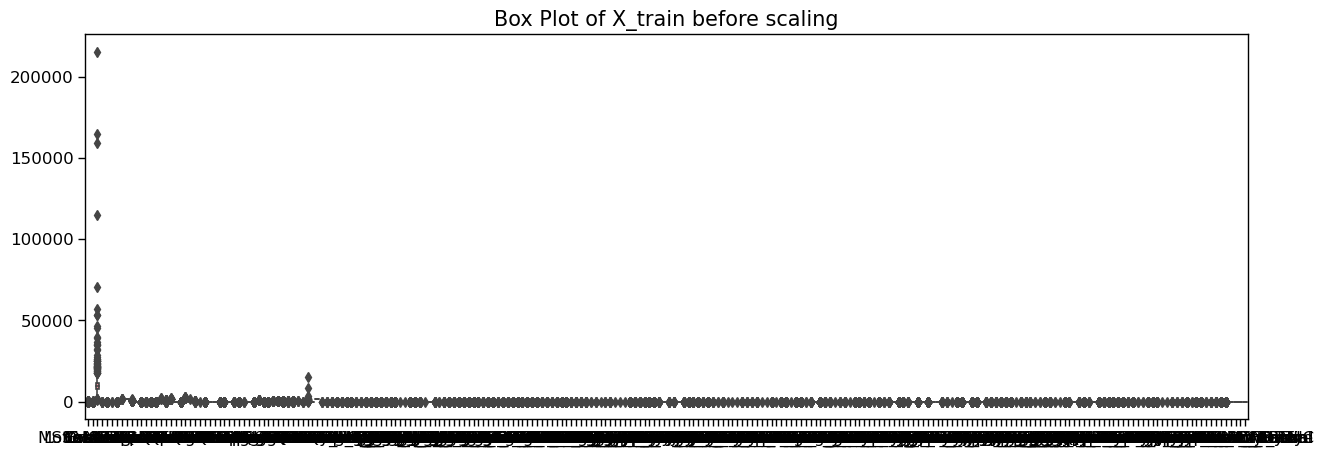

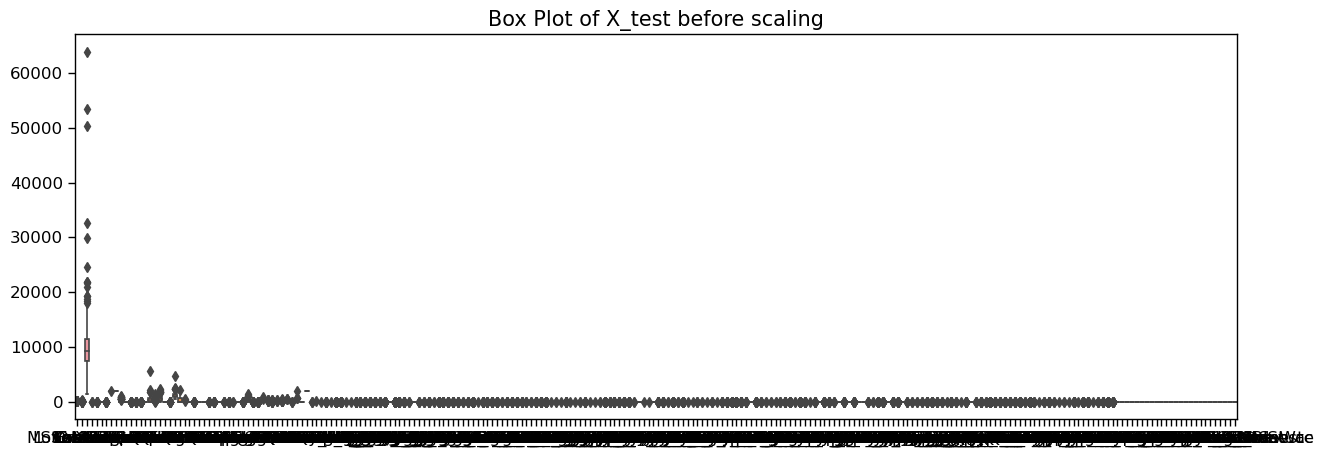

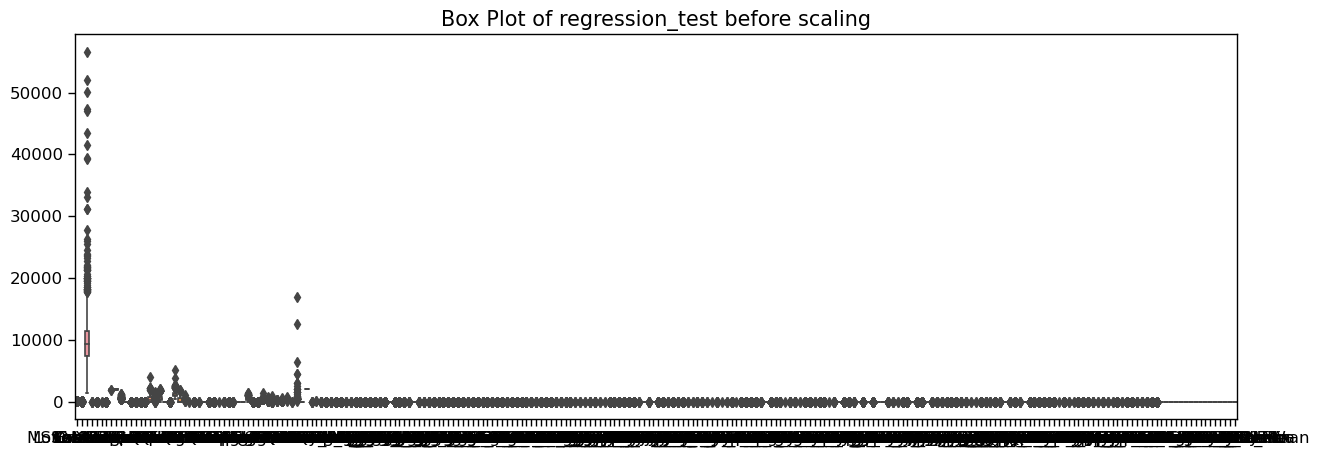

In [48]:
# Plotting boxplots of X_train, X_test & regression_test before scaling

# X_train
plt.figure(figsize=(15, 5))
sns.boxplot(data=X_train)
plt.title("Box Plot of X_train before scaling")
plt.show()

# X_test
plt.figure(figsize=(15, 5))
sns.boxplot(data=X_test)
plt.title("Box Plot of X_test before scaling")
plt.show()

# regression_test
plt.figure(figsize=(15, 5))
sns.boxplot(data=regression_test)
plt.title("Box Plot of regression_test before scaling")
plt.show()

In [49]:
# Scaling X_train, X_test & regression_test

column_order = X_train.columns
X_test = X_test.reindex(columns=column_order)
regression_test = regression_test.reindex(columns=column_order)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
regression_test_scaled = pd.DataFrame(scaler.transform(regression_test), columns=regression_test.columns)

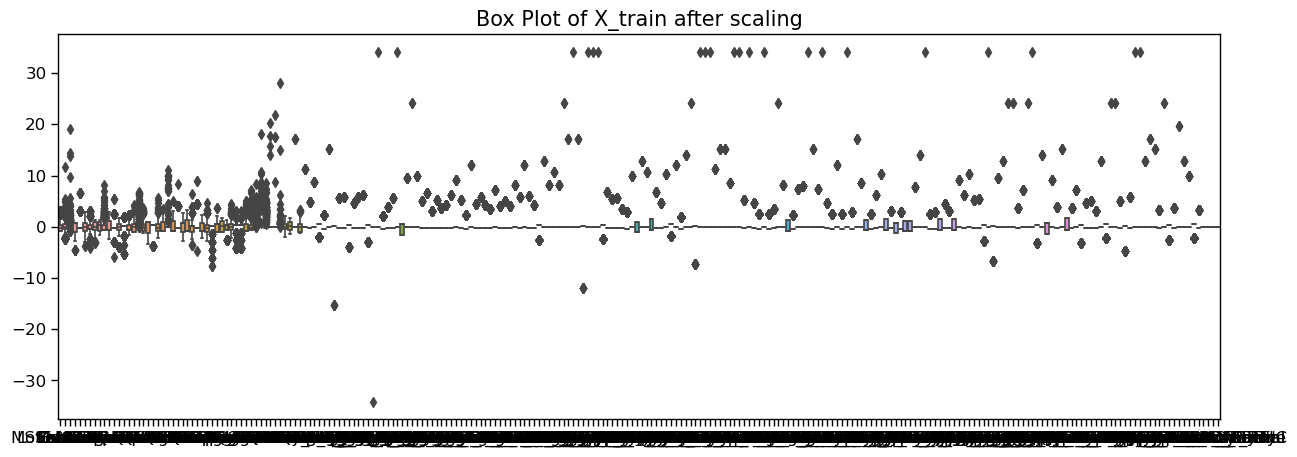

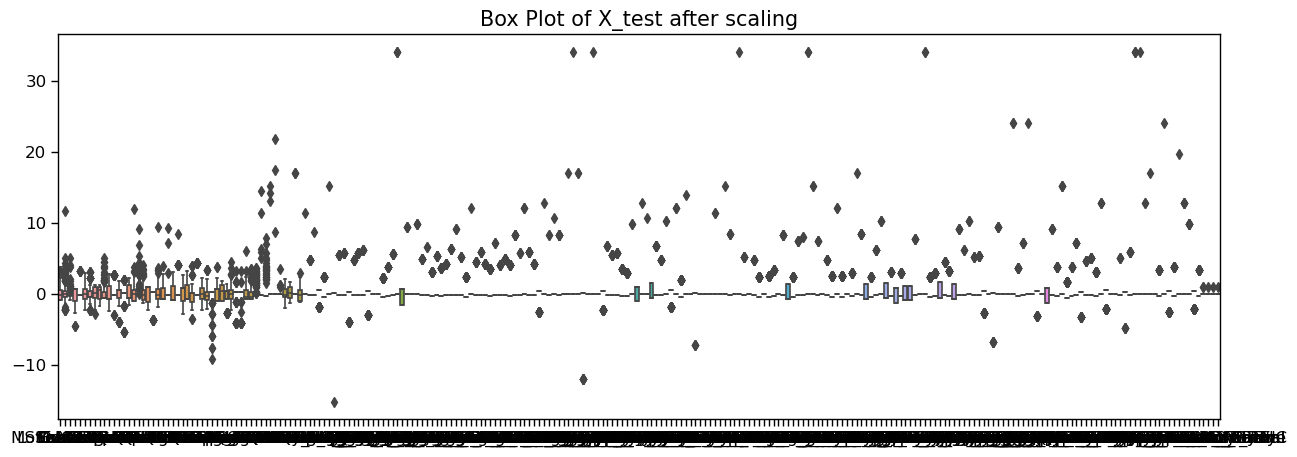

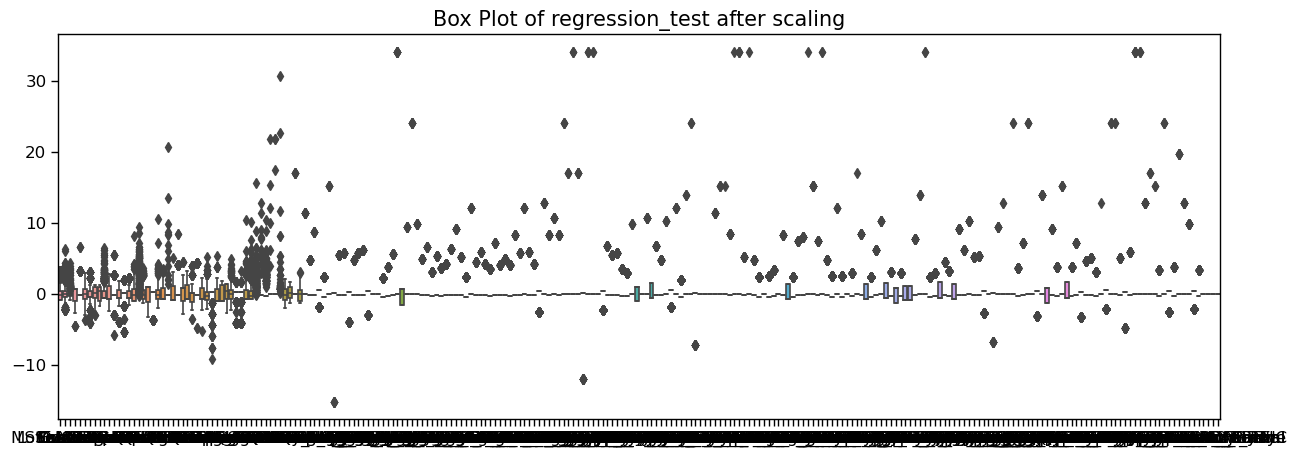

In [50]:
# Plotting boxplots of X_train, X_test & regression_test after scaling

# X_train
plt.figure(figsize=(15, 5))
sns.boxplot(data=X_train)
plt.title("Box Plot of X_train after scaling")
plt.show()

# X_test
plt.figure(figsize=(15, 5))
sns.boxplot(data=X_test)
plt.title("Box Plot of X_test after scaling")
plt.show()

# regression_test
plt.figure(figsize=(15, 5))
sns.boxplot(data=regression_test_scaled)
plt.title("Box Plot of regression_test after scaling")
plt.show()

In [51]:
# Sanity check

print('Shape of X_train and y_train: ', X_train.shape, y_train.shape)
print('Shape of X_test and y_test: ',   X_test.shape,  y_test.shape)
print('Shape of regression_test: ', regression_test_scaled.shape)

Shape of X_train and y_train:  (1168, 238) (1168,)
Shape of X_test and y_test:  (292, 238) (292,)
Shape of regression_test:  (1459, 238)


In [52]:
# Sanity check for NaN values after scaling

print((X_train.isnull().sum() >0).any())
print((X_test.isnull().sum() >0).any())
print((regression_test.isnull().sum() >0).any())

False
False
False


### __3.5 PCA of multivariate datasets and regression_test__

In [53]:
# Fitting and transforming using PCA on X_train to reduce dimensionality

pca = PCA(0.90)
X_train_pca = pca.fit_transform(X_train)

PCs = ['PC'+str(i+1) for i in range(X_train_pca.shape[1])]

X_train_pca = pd.DataFrame(X_train_pca, columns=PCs)

print('X_train shape after PCA: ', X_train_pca.shape, '\n')
X_train_pca.head()

X_train shape after PCA:  (1168, 124) 



PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -6.979637 -1.565046  1.151062  3.895367  1.361521 -0.685548 -4.985372   
1  3.505698  0.553698 -1.030354  1.184183 -1.772813  0.002252 -1.750218   
2  3.614686 -0.063770  1.435262  0.603523  0.147737 -4.626544  0.094144   
3 -4.784534  1.807428  0.189577  0.663472  1.594264 -0.348426 -1.862049   
4 -4.256105 -0.473739  0.662392  1.594384 -2.415027  0.597984  1.580624   

        PC8       PC9      PC10  ...     PC115     PC116     PC117     PC118  \
0  1.736188 -1.301138  1.378334  ... -0.107529  1.272257  0.021167 -0.037347   
1  0.197673  0.791380 -1.300790  ... -0.161938 -0.234341 -0.302717 -0.632236   
2 -2.208827 -0.027125  0.055014  ...  0.297318  1.484835 -1.147774  0.157199   
3 -1.096779 -1.912139  2.950794  ...  0.133487  0.554071 -0.514590 -0.227799   
4 -0.046485  0.017733  0.418863  ... -0.230154 -0.422917  0.324415  0.114115   

      PC119     PC120     PC121     PC122     PC123     PC124  
0  2.092966  0.407809  0.075802  0.398811 -0.191124 -0.776514  
1  0.989002 -0.812767 -0.598824  0.683995  0.571357 -0.653965  
2  0.130185 -1.095770  0.947002 -0.476775 -0.188602 -0.649941  
3  1.781451  0.829057  0.848253 -0.301272  0.202754  0.162539  
4 -0.190293 -0.300411 -0.154477 -0.397658  0.477412 -0.778718  

[5 rows x 124 columns]

In [54]:
# Transforming using PCA on X_test to reduce dimensionality

X_test_pca = pca.transform(X_test)

PCs = ['PC'+str(i+1) for i in range(X_test_pca.shape[1])]

# Converting X_test_scores from np array to pd df using PCs as columns
X_test_pca = pd.DataFrame(X_test_pca, columns=PCs)

print('X_test shape after PCA: ', X_test_pca.shape, '\n')
X_test_pca.head()

X_test shape after PCA:  (292, 124) 



PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.341224  1.626878  3.967687  3.358567  2.045574  3.322664 -1.126733   
1  4.945729  2.842974  1.361052 -0.704634 -2.079926 -1.561760 -0.980467   
2  3.595980  0.589488  1.235834 -0.240215 -0.419695 -1.838673 -0.709605   
3 -1.755564  1.933812  1.992690 -1.931000  0.896660  1.936892  0.353713   
4  2.253125 -2.317320 -4.785103 -4.498645  2.514617  2.047877 -1.413930   

        PC8       PC9      PC10  ...     PC115     PC116     PC117     PC118  \
0  0.712501 -1.988777 -0.518988  ...  0.820886  1.202689  0.315254 -1.378565   
1  0.330497  0.173875  0.939778  ...  0.509988 -0.470966  0.273505 -1.289325   
2 -1.114862  0.584165 -2.219410  ... -1.234808 -0.234910 -1.684939 -1.475176   
3 -0.730105 -0.938360 -0.925536  ... -0.623018  1.249710  0.732335 -0.364135   
4  0.763122 -2.075250 -1.856654  ...  0.501863  0.698598  1.368157  2.442649   

      PC119     PC120     PC121     PC122     PC123     PC124  
0 -1.544581  2.738357 -0.809204  1.780339 -1.096171 -0.169308  
1 -0.417218  0.325892 -0.491699 -0.135649  0.007404 -0.912705  
2  3.987063  0.831855  0.257779 -0.754520 -0.210863  1.544627  
3 -0.628939 -0.137450 -0.705725 -1.981318  0.677297 -1.254064  
4 -1.303056 -1.073604 -0.654554 -0.093174  0.757453  1.157839  

[5 rows x 124 columns]

In [55]:
# Transforming using PCA on regression_test to reduce dimensionality

regression_test_pca = pca.transform(regression_test_scaled)

PCs = ['PC'+str(i+1) for i in range(regression_test_pca.shape[1])]

# Converting X_test_scores from np array to pd df using PCs as columns
regression_test_pca = pd.DataFrame(regression_test_pca, columns=PCs)

print('regression_test shape after PCA: ', regression_test_pca.shape, '\n')
regression_test_pca.head()

regression_test shape after PCA:  (1459, 124) 



PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.794670  2.757010 -1.590116  0.304499 -1.865359 -0.270666 -0.556106   
1  1.620882  4.246531  1.826444 -0.991043 -0.338481  4.770352 -5.383799   
2 -2.207017 -0.443037 -0.484124 -1.782384 -1.518777  0.637968  2.972124   
3 -3.540060 -0.919421 -0.006976 -1.811685 -1.358801  1.129225  2.463692   
4 -1.842726  0.352696 -2.718305  0.278021  2.470042 -0.603055  0.116248   

        PC8        PC9      PC10  ...     PC115     PC116     PC117     PC118  \
0  0.873860   1.042937  0.210559  ...  0.482420  1.195092  0.136235  1.601710   
1 -3.896127  14.929644  6.977648  ... -0.143440 -0.948945  1.784726  3.005891   
2 -0.885409   0.523220  0.156577  ...  0.754999  0.079215 -0.849840 -0.207657   
3 -1.222137  -0.239512 -0.063997  ...  0.342319 -0.259604 -0.620768  0.709162   
4 -1.429084  -0.619422  0.185619  ... -1.977374  1.085357  0.232619  0.989263   

      PC119     PC120     PC121     PC122     PC123     PC124  
0  0.251351  0.131566 -0.396356 -0.288691  1.500578  1.113036  
1  0.809756 -2.695573  0.026669 -0.498091 -1.221623 -0.332122  
2  0.109616 -0.709365 -1.477843 -0.186591 -0.249369 -0.144124  
3  0.354642 -0.714198 -0.836371 -0.533502 -0.209385 -0.065114  
4  0.368212  0.039277 -0.663905 -0.723255  0.361619 -2.231610  

[5 rows x 124 columns]

In [56]:
# Calculating the explained and cumnulative variance

exp_var = [i*100 for i in pca.explained_variance_ratio_]
cum_var = np.cumsum(pca.explained_variance_ratio_*100)

pca_var = pd.DataFrame(data={'exp_var': exp_var, 'cum_var': cum_var}, index=PCs)
pca_var

exp_var    cum_var
PC1    6.557714   6.557714
PC2    3.388619   9.946333
PC3    2.406637  12.352970
PC4    2.034509  14.387479
PC5    1.897302  16.284781
...         ...        ...
PC120  0.283960  88.980727
PC121  0.282038  89.262766
PC122  0.277742  89.540508
PC123  0.274853  89.815361
PC124  0.274215  90.089575

[124 rows x 2 columns]

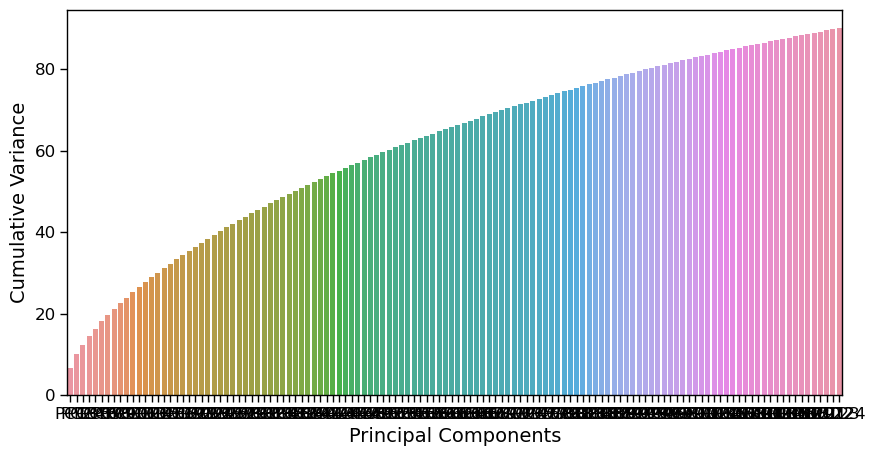

In [57]:
# Plotting the cumulative variance up to the cut-off, i.e. 90% 

fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x=pca_var.index, y='cum_var', data=pca_var)
ax.set(xlabel='Principal Components', ylabel='Cumulative Variance')
plt.show()

## __4. Prediction using regression (multivariate) of the train set__

In [58]:
# Creating an empty DataFrame to add prediction models

regr_results = pd.DataFrame([])

### __4.1 Linear Regression__

In [59]:
# Linear regression 

linear_regr = LinearRegression()
linear_regr.fit(X_train_pca, y_train)
y_pred = linear_regr.predict(X_test_pca)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred),3)))
print('MSE : '+str(round(mean_squared_error(y_test, y_pred),3)))
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test, y_pred)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred),3)))

r2 score (coefficient of determination): 0.685
MSE : 2177094680.734
RMSE : 46659.347
MAE : 25211.277


In [60]:
# Comparing actuals vs predicted values from linear regression model

comparison = pd.DataFrame([])
comparison['y_actual'] = y_test
comparison['y_predicted'] = y_pred
comparison = comparison.round(2)
comparison.head()

y_actual  y_predicted
529    200624    295730.64
491    133000    133844.19
459    110000    135009.87
279    192000    237708.20
655     88000     76599.49

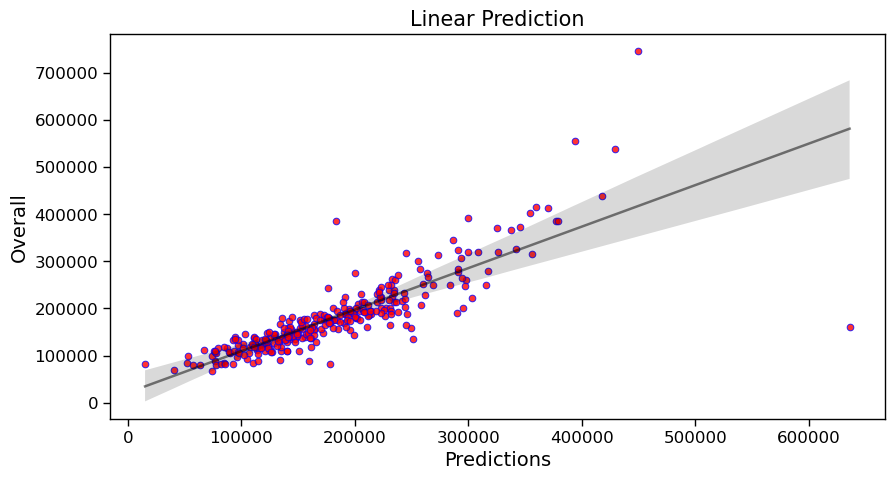



Slope:  [-15590.5649536    -876.53948004  12692.86434036    175.0667643
   2619.91123825  -2380.55279462  -5871.10756264  -2228.24326303
  -4270.17230649   2535.97355997  -1057.41373564  -2047.12468886
   1210.17191173    473.15546227    604.25401749  -2763.92798797
     21.41833663   -830.70611041   -456.99471059   2882.66879792
    -84.67055806   1874.66785311   1133.22813128  -1894.36679797
   -789.85703342  -4285.39775651   -262.25469748  -1186.53359483
   2805.85743133  -3011.51385829    -79.39181529   2911.93302974
   -539.59154012    397.21541944    975.21841926   -350.24807644
  -1990.23351522    394.67541512    -53.04611009  -1065.65940374
    690.9406639   -1557.28637827   -809.77943702  -2689.30241125
  -3400.80093792   -989.09579813  -5359.92286078   -552.19115
   3053.31261055  -4999.30024628  -1211.95017309   -688.39784357
   1175.42376073  -3321.70899488  -1133.36991991  -2051.96320902
   -651.841086    -2096.59898894   1465.74807453  -2382.37559341
   1856.93044862   

In [61]:
# Visualization of actuals vs predicted values from linear regression model

plt.figure(figsize=(10,5))
sns.regplot(x= y_pred, y = y_test, 
            scatter_kws={'color':'red',
                         'edgecolor':'blue',
                         'linewidths':0.7},
            line_kws={'color':'black','alpha':0.5}
           )
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction")
plt.show()

print('\n\nSlope: ' ,     linear_regr.coef_)
print('\n\nIntercept:', linear_regr.intercept_)

In [62]:
# Adding model's performance to regr_results dataframe 

regr_results = pd.concat([regr_results, pd.json_normalize({'Multivariate Model': 'Linear model (OLS)',
                                                           'r2':   round(r2_score(y_test, y_pred),3),
                                                           'MSE': round(mean_squared_error(y_test, y_pred),3),
                                                           'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred)),3),
                                                           'MAE':  round(mean_absolute_error(y_test, y_pred),3)})])

regr_results

Multivariate Model     r2           MSE       RMSE        MAE
0  Linear model (OLS)  0.685  2.177095e+09  46659.347  25211.277

### __4.2 Ridge__

In [63]:
# Ridge regression

ridge_regr = Ridge(alpha=0.1)
ridge_regr.fit(X_train_pca, y_train)
y_pred_ridge = ridge_regr.predict(X_test_pca)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred_ridge),3)))
print('MSE : '+str(round(mean_squared_error(y_test, y_pred_ridge),3)))  
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test, y_pred_ridge)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred_ridge),3)))

r2 score (coefficient of determination): 0.685
MSE : 2177021288.922
RMSE : 46658.561
MAE : 25210.746


In [64]:
# Comparing actuals vs predicted values from linear regression model

comparison = pd.DataFrame([])
comparison['y_actual'] = y_test
comparison['y_predicted'] = y_pred_ridge
comparison = comparison.round(2)
comparison.head()

y_actual  y_predicted
529    200624    295726.99
491    133000    133843.49
459    110000    135010.72
279    192000    237706.46
655     88000     76601.13

In [65]:
# Selecting the optimal alpha 

ridgeCV_model = RidgeCV(alphas=np.logspace(-6, 6, 13), scoring='r2', cv=10)
ridgeCV_model.fit(X_train_pca, y_train)

optimal_alpha = ridgeCV_model.alpha_
print(optimal_alpha)

1000.0


In [66]:
# Applying optimal Ridge model

ridge_optmodel = Ridge(alpha = optimal_alpha)
ridge_optmodel.fit(X_train_pca, y_train)
y_pred_ridge_opt = ridge_optmodel.predict(X_test_pca)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred_ridge_opt),3)))
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test, y_pred_ridge_opt)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred_ridge_opt),3)))

r2 score (coefficient of determination): 0.719
RMSE : 44052.672
MAE : 23248.744


In [67]:
# Adding model's performance to regr_results dataframe

regr_results = pd.concat([regr_results, pd.json_normalize({'Multivariate Model': 'Ridge',
                                                            'r2':   round(r2_score(y_test, y_pred_ridge_opt),3), 
                                                            'MSE': round(mean_squared_error(y_test, y_pred_ridge_opt),3),
                                                            'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred_ridge_opt)),3),
                                                            'MAE':  round(mean_absolute_error(y_test, y_pred_ridge_opt),3)})])

regr_results

Multivariate Model     r2           MSE       RMSE        MAE
0  Linear model (OLS)  0.685  2.177095e+09  46659.347  25211.277
0               Ridge  0.719  1.940638e+09  44052.672  23248.744

### __4.3 Lasso__

In [68]:
# Lasso regression

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_pca, y_train)
y_pred_lasso = lasso.predict(X_test_pca)

print("Training score:", lasso.score(X_train_pca, y_train))
print("Testing score:",  lasso.score(X_test_pca, y_test))
print("MAE of Lasso Regression:", mean_absolute_error(y_test, y_pred_lasso), '\n')

Training score: 0.8951465706222985
Testing score: 0.6847506908668217
MAE of Lasso Regression: 25211.042809613726 



In [69]:
# Selecting the optimal alpha 

lassoCV_model = LassoCV(alphas=np.logspace(-6, 6, 13), cv=10, random_state=0) 
lassoCV_model.fit(X_train_pca, y_train)

optimal_alpha = lassoCV_model.alpha_
print(optimal_alpha)

1000.0


In [70]:
# Applying optimal Lasso model

lasso_optmodel = Lasso(alpha = optimal_alpha)
lasso_optmodel.fit(X_train_pca, y_train)
y_pred_lasso_opt = lasso_optmodel.predict(X_test_pca)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred_lasso_opt),3)))
print('MSE : '+str(round(mean_squared_error(y_test, y_pred_lasso_opt),3)))  
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test, y_pred_lasso_opt)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred_lasso_opt),3)))
print('Model coefficients:', lasso_optmodel.coef_)

r2 score (coefficient of determination): 0.712
MSE : 1987149087.123
RMSE : 44577.45
MAE : 23846.293
Model coefficients: [-1.55253974e+04 -7.50426038e+02  1.25152927e+04  0.00000000e+00
  2.39467008e+03 -2.13814145e+03 -5.59632308e+03 -1.94273492e+03
 -3.97603136e+03  2.21774775e+03 -7.32402251e+02 -1.72067631e+03
  8.57571893e+02  1.14681165e+02  2.30008299e+02 -2.37748963e+03
  0.00000000e+00 -4.34731194e+02 -4.69785242e+01  2.47148731e+03
 -0.00000000e+00  1.43512579e+03  6.87597947e+02 -1.44323889e+03
 -3.32281812e+02 -3.81223802e+03 -0.00000000e+00 -6.97178046e+02
  2.30298630e+03 -2.50462699e+03 -0.00000000e+00  2.39457532e+03
 -1.27795919e+01  0.00000000e+00  4.29384051e+02 -0.00000000e+00
 -1.42638711e+03  0.00000000e+00 -0.00000000e+00 -4.73072960e+02
  7.97940292e+01 -9.40293119e+02 -1.86278357e+02 -2.05577549e+03
 -2.75944991e+03 -3.27749474e+02 -4.69774171e+03 -0.00000000e+00
  2.37476412e+03 -4.31444476e+03 -5.24346164e+02 -0.00000000e+00
  4.59080067e+02 -2.59896943e+03 -4

In [71]:
# Adding model's performance to regr_results dataframe

regr_results = pd.concat([regr_results, pd.json_normalize({'Multivariate Model': 'Lasso',
                                                            'r2':   round(r2_score(y_test, y_pred_lasso_opt),3), 
                                                           'MSE': round(mean_squared_error(y_test, y_pred_lasso_opt),3),
                                                            'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred_lasso_opt)),3),
                                                            'MAE':  round(mean_absolute_error(y_test, y_pred_lasso_opt),3)})])

regr_results

Multivariate Model     r2           MSE       RMSE        MAE
0  Linear model (OLS)  0.685  2.177095e+09  46659.347  25211.277
0               Ridge  0.719  1.940638e+09  44052.672  23248.744
0               Lasso  0.712  1.987149e+09  44577.450  23846.293

### __4.4 Polynomial Regression__

In [72]:
# Polynomial regression

polynomial_features= PolynomialFeatures(degree=3)

X_train_poly = polynomial_features.fit_transform(X_train_pca)
X_test_poly  = polynomial_features.transform(X_test_pca)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred_poly),3)))
print('MSE : '+str(round(mean_squared_error(y_test, y_pred_poly),3)))  
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test, y_pred_poly)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred_poly),3)))

r2 score (coefficient of determination): -2.842
MSE : 26535410222.625
RMSE : 162896.931
MAE : 36962.934


In [73]:
# Adding model's performance to regr_results dataframe

regr_results = pd.concat([regr_results, pd.json_normalize({'Multivariate Model': 'Poly',
                                                            'r2':   round(r2_score(y_test, y_pred_poly),3), 
                                                           'MSE': round(mean_squared_error(y_test, y_pred_poly),3),
                                                            'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred_poly)),3),
                                                            'MAE':  round(mean_absolute_error(y_test, y_pred_poly),3)})])

regr_results

Multivariate Model     r2           MSE        RMSE        MAE
0  Linear model (OLS)  0.685  2.177095e+09   46659.347  25211.277
0               Ridge  0.719  1.940638e+09   44052.672  23248.744
0               Lasso  0.712  1.987149e+09   44577.450  23846.293
0                Poly -2.842  2.653541e+10  162896.931  36962.934

### __4.5 Random Forest Regressor__

In [74]:
# Random Forest Regressor

rr  = RandomForestRegressor(random_state=0)
rr.fit(X_train_pca, y_train)
y_pred_rr = rr.predict(X_test_pca)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred_rr),3)))
print('MSE : '+str(round(mean_squared_error(y_test, y_pred_rr),3)))  
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test, y_pred_rr)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred_rr),3)))

r2 score (coefficient of determination): 0.713
MSE : 1982807161.904
RMSE : 44528.723
MAE : 21904.482


In [75]:
# Optimizing model using random grid 

random_grid = {'n_estimators': [int(x) for x in np.linspace(10,200,10)],
               'max_depth': [int(x) for x in np.linspace(10,100,10)],
               'min_samples_split': [2,3,4,5,10],
               'min_samples_leaf':  [1,2,4,10,15,20]}

rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(),
                               param_distributions = random_grid,
                               n_iter=10,
                               cv = 5, 
                               n_jobs=-1)

rf_random.fit(X_train_pca,y_train)
rf_random.best_params_

{'n_estimators': 94,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 10}

In [76]:
# Applying optimal RFR model

rf_opt = rf_random.best_estimator_
rf_opt.fit(X_train_pca,y_train)
y_pred_rr_opt = rf_opt.predict(X_test_pca)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred_rr_opt),3)))
print('MSE : '+str(round(mean_squared_error(y_test, y_pred_rr_opt),3)))  
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test, y_pred_rr_opt)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred_rr_opt),3)))

r2 score (coefficient of determination): 0.723
MSE : 1912937456.539
RMSE : 43737.14
MAE : 21879.85


In [77]:
# Adding model's performance to regr_results dataframe

regr_results = pd.concat([regr_results, pd.json_normalize({'Multivariate Model': 'RFRegressor',
                                                            'r2':   round(r2_score(y_test, y_pred_rr_opt),3),
                                                           'MSE': round(mean_squared_error(y_test, y_pred_rr_opt),3),
                                                            'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred_rr_opt)),3),
                                                            'MAE':  round(mean_absolute_error(y_test, y_pred_rr_opt),3)})])

regr_results

Multivariate Model     r2           MSE        RMSE        MAE
0  Linear model (OLS)  0.685  2.177095e+09   46659.347  25211.277
0               Ridge  0.719  1.940638e+09   44052.672  23248.744
0               Lasso  0.712  1.987149e+09   44577.450  23846.293
0                Poly -2.842  2.653541e+10  162896.931  36962.934
0         RFRegressor  0.723  1.912937e+09   43737.140  21879.850

### __4.6 Models' performance__

In [78]:
# Sorting all models performances to investigate which one should be used on the unknown 'test.csv' data set

regr_results.sort_values(by=['RMSE'], ascending=[True])

Multivariate Model     r2           MSE        RMSE        MAE
0         RFRegressor  0.723  1.912937e+09   43737.140  21879.850
0               Ridge  0.719  1.940638e+09   44052.672  23248.744
0               Lasso  0.712  1.987149e+09   44577.450  23846.293
0  Linear model (OLS)  0.685  2.177095e+09   46659.347  25211.277
0                Poly -2.842  2.653541e+10  162896.931  36962.934

## __5. Prediction using regression (univariate) of the train set__

In [79]:
# Creating an empty DataFrame to add prediction models

regr_results_univa = pd.DataFrame([])

### __5.1 Linear Regression__

In [80]:
# Linear regression 

linear_regr_univa = LinearRegression()
linear_regr_univa.fit(X_train_univa, y_train_univa)
y_pred_univa = linear_regr_univa.predict(X_test_univa)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test, y_pred_univa),3)))
print('MSE : '+str(round(mean_squared_error(y_test, y_pred_univa),3)))
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test, y_pred_univa)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test, y_pred_univa),3)))

r2 score (coefficient of determination): 0.627
MSE : 2572969092.66
RMSE : 50724.443
MAE : 32160.942


In [81]:
# Comparing actuals vs predicted values from linear regression model

comparison = pd.DataFrame([])
comparison['y_actual'] = y_test_univa
comparison['y_predicted'] = y_pred_univa
comparison = comparison.round(2)
comparison.head()

y_actual  y_predicted
529    200624    176884.20
491    133000    176884.20
459    110000    131497.62
279    192000    222270.79
655     88000    176884.20

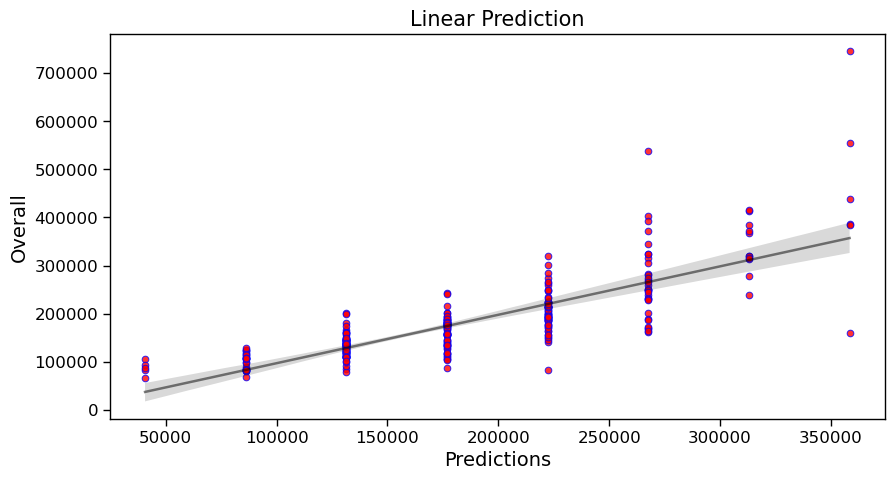



Slope:  [45386.58535667]


Intercept: -95435.30933266156


In [82]:
# Visualization of actuals vs predicted values from linear regression model

plt.figure(figsize=(10,5))
sns.regplot(x= y_pred_univa, y = y_test_univa, 
            scatter_kws={'color':'red',
                         'edgecolor':'blue',
                         'linewidths':0.7},
            line_kws={'color':'black','alpha':0.5}
           )
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction")
plt.show()

print('\n\nSlope: ' ,     linear_regr_univa.coef_)
print('\n\nIntercept:', linear_regr_univa.intercept_)

In [83]:
# Adding model's performance to regr_results_univa dataframe 

regr_results_univa = pd.concat([regr_results_univa, pd.json_normalize({'Univariate Model': 'Linear model (OLS)',
                                                           'r2':   round(r2_score(y_test_univa, y_pred_univa),3),
                                                            'MSE': round(mean_squared_error(y_test_univa, y_pred_univa),3),
                                                           'RMSE': round(np.sqrt(mean_squared_error(y_test_univa, y_pred_univa)),3),
                                                           'MAE':  round(mean_absolute_error(y_test_univa, y_pred_univa),3)})])

regr_results_univa

Univariate Model     r2           MSE       RMSE        MAE
0  Linear model (OLS)  0.627  2.572969e+09  50724.443  32160.942

### __5.2 Ridge__

In [84]:
# Ridge regression

ridge_regr_univa = Ridge(alpha=0.1)
ridge_regr_univa.fit(X_train_univa, y_train_univa)
y_pred_ridge_univa = ridge_regr_univa.predict(X_test_univa)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test_univa, y_pred_ridge_univa),3)))
print('MSE : '+str(round(mean_squared_error(y_test_univa, y_pred_ridge_univa),3)))  
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test_univa, y_pred_ridge_univa)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test_univa, y_pred_ridge_univa),3)))

r2 score (coefficient of determination): 0.627
MSE : 2572970932.408
RMSE : 50724.461
MAE : 32160.527


In [85]:
# Comparing actuals vs predicted values from linear regression model

comparison = pd.DataFrame([])
comparison['y_actual'] = y_test_univa
comparison['y_predicted'] = y_pred_ridge_univa
comparison = comparison.round(2)
comparison.head()

y_actual  y_predicted
529    200624    176884.38
491    133000    176884.38
459    110000    131499.88
279    192000    222268.89
655     88000    176884.38

In [86]:
# Selecting the optimal alpha 

ridgeCV_model_univa = RidgeCV(alphas=np.logspace(-6, 6, 13), scoring='r2', cv=10)
ridgeCV_model_univa.fit(X_train_univa, y_train_univa)

optimal_alpha_univa = ridgeCV_model_univa.alpha_
print(optimal_alpha_univa)

10.0


In [87]:
# Applying optimal ridge model

ridge_optmodel_univa = Ridge(alpha = optimal_alpha_univa)
ridge_optmodel_univa.fit(X_train_univa, y_train_univa)
y_pred_ridge_opt_univa = ridge_optmodel_univa.predict(X_test_univa)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test_univa, y_pred_ridge_opt_univa),3)))
print('MSE : '+str(round(mean_squared_error(y_test_univa, y_pred_ridge_opt_univa),3)))  
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test_univa, y_pred_ridge_opt_univa)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test_univa, y_pred_ridge_opt_univa),3)))

r2 score (coefficient of determination): 0.627
MSE : 2573240669.65
RMSE : 50727.12
MAE : 32124.983


In [88]:
# Adding model's performance to regr_results_univa dataframe

regr_results_univa = pd.concat([regr_results_univa, pd.json_normalize({'Univariate Model': 'Ridge',
                                                            'r2':   round(r2_score(y_test_univa, y_pred_ridge_opt_univa),3), 
                                                            'MSE': round(mean_squared_error(y_test_univa, y_pred_ridge_opt_univa),3),
                                                            'RMSE': round(np.sqrt(mean_squared_error(y_test_univa, y_pred_ridge_opt_univa)),3),
                                                            'MAE':  round(mean_absolute_error(y_test_univa, y_pred_ridge_opt_univa),3)})])

regr_results_univa

Univariate Model     r2           MSE       RMSE        MAE
0  Linear model (OLS)  0.627  2.572969e+09  50724.443  32160.942
0               Ridge  0.627  2.573241e+09  50727.120  32124.983

### __5.3 Lasso__

In [89]:
# Lasso regression

lasso_univa = Lasso(alpha=0.1)
lasso_univa.fit(X_train_univa, y_train_univa)
y_pred_lasso_univa = lasso_univa.predict(X_test_univa)

print("Training score:", lasso_univa.score(X_train_univa, y_train_univa))
print("Testing score:",  lasso_univa.score(X_test_univa, y_test_univa))
print("MAE of Lasso Regression:", mean_absolute_error(y_test_univa, y_pred_lasso_univa), '\n')

Training score: 0.6251058616821632
Testing score: 0.6274218013434008
MAE of Lasso Regression: 32160.931708119006 



In [90]:
# Selecting the optimal alpha 

lassoCV_model_univa = LassoCV(alphas=np.logspace(-6, 6, 13), cv=10, random_state=0) 
lassoCV_model_univa.fit(X_train_univa, y_train_univa)

optimal_alpha_univa = lassoCV_model_univa.alpha_
print(optimal_alpha_univa)

10.0


In [91]:
# Applying optimal lasso model

lasso_optmodel_univa = Lasso(alpha = optimal_alpha_univa)
lasso_optmodel_univa.fit(X_train_univa, y_train_univa)
y_pred_lasso_opt_univa = lasso_optmodel_univa.predict(X_test_univa)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test_univa, y_pred_lasso_opt_univa),3)))
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test_univa, y_pred_lasso_opt_univa)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test_univa, y_pred_lasso_opt_univa),3)))

print('Model coefficients:', lasso_optmodel_univa.coef_)

r2 score (coefficient of determination): 0.627
RMSE : 50724.49
MAE : 32159.898
Model coefficients: [45381.23312254]


In [92]:
# Adding model's performance to regr_results_univa dataframe

regr_results_univa = pd.concat([regr_results_univa, pd.json_normalize({'Univariate Model': 'Lasso',
                                                            'r2':   round(r2_score(y_test_univa, y_pred_lasso_opt_univa),3), 
                                                            'MSE': round(mean_squared_error(y_test_univa, y_pred_lasso_opt_univa),3),
                                                            'RMSE': round(np.sqrt(mean_squared_error(y_test_univa, y_pred_lasso_opt_univa)),3),
                                                            'MAE':  round(mean_absolute_error(y_test_univa, y_pred_lasso_opt_univa),3)})])

regr_results_univa

Univariate Model     r2           MSE       RMSE        MAE
0  Linear model (OLS)  0.627  2.572969e+09  50724.443  32160.942
0               Ridge  0.627  2.573241e+09  50727.120  32124.983
0               Lasso  0.627  2.572974e+09  50724.490  32159.898

### __5.4 Polynomial Regression__

In [93]:
# Polynomial regression

polynomial_features_univa = PolynomialFeatures(degree=3)

X_train_poly_univa = polynomial_features_univa.fit_transform(X_train_univa)
X_test_poly_univa  = polynomial_features_univa.transform(X_test_univa)

poly_model_univa = LinearRegression()
poly_model_univa.fit(X_train_poly_univa, y_train_univa)
y_pred_poly_univa = poly_model_univa.predict(X_test_poly_univa)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test_univa, y_pred_poly_univa),3)))
print('MSE : '+str(round(mean_squared_error(y_test_univa, y_pred_poly_univa),3)))  
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test_univa, y_pred_poly_univa)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test_univa, y_pred_poly_univa),3)))

r2 score (coefficient of determination): 0.674
MSE : 2254224831.703
RMSE : 47478.678
MAE : 30125.632


In [94]:
# Adding model's performance to regr_results_univa dataframe

regr_results_univa = pd.concat([regr_results_univa, pd.json_normalize({'Univariate Model': 'Poly',
                                                            'r2':   round(r2_score(y_test_univa, y_pred_poly_univa),3), 
                                                            'MSE': round(mean_squared_error(y_test_univa, y_pred_poly_univa),3),
                                                            'RMSE': round(np.sqrt(mean_squared_error(y_test_univa, y_pred_poly_univa)),3),
                                                            'MAE':  round(mean_absolute_error(y_test_univa, y_pred_poly_univa),3)})])

regr_results_univa

Univariate Model     r2           MSE       RMSE        MAE
0  Linear model (OLS)  0.627  2.572969e+09  50724.443  32160.942
0               Ridge  0.627  2.573241e+09  50727.120  32124.983
0               Lasso  0.627  2.572974e+09  50724.490  32159.898
0                Poly  0.674  2.254225e+09  47478.678  30125.632

### __5.5 Random Forest Regressor__

In [95]:
# Random Forest Regressor

rr_univa  = RandomForestRegressor(random_state=0)
rr_univa.fit(X_train_univa, y_train_univa)
y_pred_rr_univa = rr_univa.predict(X_test_univa)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test_univa, y_pred_rr_univa),3)))
print('MSE : '+str(round(mean_squared_error(y_test_univa, y_pred_rr_univa),3)))
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test_univa, y_pred_rr_univa)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test_univa, y_pred_rr_univa),3)))

r2 score (coefficient of determination): 0.668
MSE : 2292471866.412
RMSE : 47879.765
MAE : 30204.018


In [96]:
# Optimizing model using random grid 

random_grid_univa = {'n_estimators': [int(x) for x in np.linspace(10,200,10)],
               'max_depth': [int(x) for x in np.linspace(10,100,10)],
               'min_samples_split': [2,3,4,5,10],
               'min_samples_leaf':  [1,2,4,10,15,20]}

rr_random_univa = RandomizedSearchCV(estimator = RandomForestRegressor(),
                               param_distributions = random_grid_univa,
                               n_iter=10,
                               cv = 5, 
                               n_jobs=-1)

rr_random_univa.fit(X_train_univa,y_train_univa)
rr_random_univa.best_params_

{'n_estimators': 115,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_depth': 40}

In [97]:
# Applying optimal RF model

rr_opt_univa = rr_random_univa.best_estimator_
rr_opt_univa.fit(X_train_univa,y_train_univa)
y_pred_rr_opt_univa = rr_opt_univa.predict(X_test_univa)

print('r2 score (coefficient of determination): '+str(round(r2_score(y_test_univa, y_pred_rr_opt_univa),3)))
print('MSE : '+str(round(mean_squared_error(y_test_univa, y_pred_rr_opt_univa),3)))
print('RMSE : '+str(round(np.sqrt(mean_squared_error(y_test_univa, y_pred_rr_opt_univa)),3)))  
print('MAE : ' +str(round(mean_absolute_error(y_test_univa, y_pred_rr_opt_univa),3)))

r2 score (coefficient of determination): 0.656
MSE : 2377196263.163
RMSE : 48756.5
MAE : 30441.495


In [98]:
# Adding model's performance to regr_results_univa dataframe

regr_results_univa = pd.concat([regr_results_univa, pd.json_normalize({'Univariate Model': 'RFRegressor',
                                                            'r2':   round(r2_score(y_test_univa, y_pred_rr_opt_univa),3),
                                                            'MSE': round(mean_squared_error(y_test_univa, y_pred_rr_opt_univa),3),
                                                            'RMSE': round(np.sqrt(mean_squared_error(y_test_univa, y_pred_rr_opt_univa)),3),
                                                            'MAE':  round(mean_absolute_error(y_test_univa, y_pred_rr_opt_univa),3)})])

regr_results_univa

Univariate Model     r2           MSE       RMSE        MAE
0  Linear model (OLS)  0.627  2.572969e+09  50724.443  32160.942
0               Ridge  0.627  2.573241e+09  50727.120  32124.983
0               Lasso  0.627  2.572974e+09  50724.490  32159.898
0                Poly  0.674  2.254225e+09  47478.678  30125.632
0         RFRegressor  0.656  2.377196e+09  48756.500  30441.495

### __5.6 Models' performance__

In [99]:
# Sorting all models performances to investigate which one should be used on the unknown 'test.csv' data set

regr_results_univa.sort_values(by=['RMSE'], ascending=[True])

Univariate Model     r2           MSE       RMSE        MAE
0                Poly  0.674  2.254225e+09  47478.678  30125.632
0         RFRegressor  0.656  2.377196e+09  48756.500  30441.495
0  Linear model (OLS)  0.627  2.572969e+09  50724.443  32160.942
0               Lasso  0.627  2.572974e+09  50724.490  32159.898
0               Ridge  0.627  2.573241e+09  50727.120  32124.983

## __6. Predicting unknown data set__

### __6.1 Multivariate best performing model__ 

In [100]:
# Applying multivariate optimal RFR model on the regression_test_pca to predict 'SalePrice'

y_pred_multiva_regression_test_opt_rr = rf_opt.predict(regression_test_pca)
regression_test_pca['SalePrice'] = y_pred_multiva_regression_test_opt_rr.round(2)
regression_test_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.794670  2.757010 -1.590116  0.304499 -1.865359 -0.270666 -0.556106   
1  1.620882  4.246531  1.826444 -0.991043 -0.338481  4.770352 -5.383799   
2 -2.207017 -0.443037 -0.484124 -1.782384 -1.518777  0.637968  2.972124   
3 -3.540060 -0.919421 -0.006976 -1.811685 -1.358801  1.129225  2.463692   
4 -1.842726  0.352696 -2.718305  0.278021  2.470042 -0.603055  0.116248   

        PC8        PC9      PC10  ...     PC116     PC117     PC118     PC119  \
0  0.873860   1.042937  0.210559  ...  1.195092  0.136235  1.601710  0.251351   
1 -3.896127  14.929644  6.977648  ... -0.948945  1.784726  3.005891  0.809756   
2 -0.885409   0.523220  0.156577  ...  0.079215 -0.849840 -0.207657  0.109616   
3 -1.222137  -0.239512 -0.063997  ... -0.259604 -0.620768  0.709162  0.354642   
4 -1.429084  -0.619422  0.185619  ...  1.085357  0.232619  0.989263  0.368212   

      PC120     PC121     PC122     PC123     PC124  SalePrice  
0  0.131566 -0.396356 -0.288691  1.500578  1.113036  131255.14  
1 -2.695573  0.026669 -0.498091 -1.221623 -0.332122  159439.56  
2 -0.709365 -1.477843 -0.186591 -0.249369 -0.144124  180017.64  
3 -0.714198 -0.836371 -0.533502 -0.209385 -0.065114  195956.01  
4  0.039277 -0.663905 -0.723255  0.361619 -2.231610  184661.14  

[5 rows x 125 columns]

### __6.2 Univariate best performing model__

In [101]:
# Extracting 'OverallQual' from regression_test (unscaled)

reg_test_univa = regression_test['OverallQual']

In [102]:
# # Applying multivariate optimal polynomial model on the regression_test to predict 'SalePrice'

reg_test_univa = np.array(reg_test_univa).reshape(-1, 1)

reg_test_poly_univa = polynomial_features_univa.transform(reg_test_univa)
y_pred_univa_regression_test_opt_poly = poly_model_univa.predict(reg_test_poly_univa)

y_pred_univa_regression_test_opt_poly = np.ravel(y_pred_univa_regression_test_opt_poly)

predicted_prices_df = pd.DataFrame({'SalePrice Univariate': y_pred_univa_regression_test_opt_poly.round(2)})
reg_test_univa_df = pd.DataFrame(reg_test_univa, columns=['OverallQual'])

reg_test_univa_final = pd.concat([reg_test_univa_df, predicted_prices_df], axis=1)
reg_test_univa_final.head()


C:\Users\giann\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


OverallQual  SalePrice Univariate
0            5             131448.45
1            6             164348.42
2            5             131448.45
3            6             164348.42
4            8             273950.52

### __6.3 Comparison between univariate and multivariate regression models__ 

In [103]:
# Comparison between optimal univariate and multivariate models 

uni_vs_multi = pd.concat([regression_test_pca['SalePrice'], reg_test_univa_final['SalePrice Univariate']], axis=1)
uni_vs_multi.rename(columns={'SalePrice' : 'SalePrice Multivariate'}, inplace=True)
uni_vs_multi

SalePrice Multivariate  SalePrice Univariate
0                  131255.14             131448.45
1                  159439.56             164348.42
2                  180017.64             131448.45
3                  195956.01             164348.42
4                  184661.14             273950.52
...                      ...                   ...
1454                90173.40             108122.04
1455                93740.69             108122.04
1456               171209.81             131448.45
1457               123483.89             131448.45
1458               202278.04             210592.31

[1459 rows x 2 columns]

In [104]:
# Sanity check

(uni_vs_multi.isnull().sum()>0).any()

False

In [105]:
# Statistical properties of the predicted values from univariate and multivariate optimal regression models

print("Statistical properties of predicted datasets' numerical features: \n")
uni_vs_multi.describe().T.round(3)

Statistical properties of predicted datasets' numerical features: 



count        mean        std       min        25%  \
SalePrice Multivariate  1459.0  177435.385  69960.639  64969.73  129141.38   
SalePrice Univariate    1459.0  181867.693  68602.418  57880.41  131448.45   

                              50%        75%        max  
SalePrice Multivariate  159419.41  211401.61  478043.35  
SalePrice Univariate    164348.42  210592.31  467091.36

### __6.4 Saving univariate and multivariate predictions in a csv file__

In [106]:
# Saving predicted values df (uni_vs_multi) in a csv file

uni_vs_multi.to_csv('Multi_&_univariate_regression_predictions.csv', index=False)